# Graded Challenge-4

## 1- Perkenalan

> Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

- Nama : Muhammad Irham Dinan
- Batch : FTDS-012
- Dataset : `ftds-hacktiv8-project.phase1_assignments.credit-card-information`
- Tujuan : Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

*Query*:

SELECT *
FROM `ftds-hacktiv8-project.phase1_assignments.credit-card-information`
WHERE MOD (CUST_ID, 2) = 0

## 2- Import Library

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Importasi library yang akan dipakai

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import silhouette_score,silhouette_samples
from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.ticker import FixedLocator, FixedFormatter

## 3- Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Memasukan dataset .csv ke dalam variabel data

path = 'h8dsft_P1G4_muhammad-irham-dinan.csv'
data = pd.read_csv(path)

In [3]:
# Menampilkan tinjauan 5 teratas dari dataset

data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

In [4]:
# Menampilkan tinjauan 5 terbawah dari dataset

data.tail()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

In [5]:
# Menduplikasi dataset yang asli ke dalam variabel data_original

data_original = data.copy()

In [6]:
# Memeriksa dataset melalui .info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Berdasarkan sajian di atas, dapat dilihat bahwa terdapat missing values berdasarkan keterangan non-null pada kolom `CREDIT_LIMIT` sebanyak 1 baris informasi nilai dan kolom `MINIMUM_PAYMENTS` sebanyak 158 baris informasi nilai.

In [7]:
# Memeriksa informasi deskriptif statistik pada dataset

data.describe().T

count         mean          std  \
CUST_ID                           4475.0  4476.000000  2583.931114   
BALANCE                           4475.0  1565.743939  2091.205727   
BALANCE_FREQUENCY                 4475.0     0.877608     0.235604   
PURCHASES                         4475.0  1003.158324  2210.812899   
ONEOFF_PURCHASES                  4475.0   588.504849  1666.500287   
INSTALLMENTS_PURCHASES            4475.0   415.025075   927.360842   
CASH_ADVANCE                      4475.0   973.453671  2133.464502   
PURCHASES_FREQUENCY               4475.0     0.490122     0.399874   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202614     0.298502   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.364989     0.397336   
CASH_ADVANCE_FREQUENCY            4475.0     0.134156     0.199221   
CASH_ADVANCE_TRX                  4475.0     3.196425     6.500169   
PURCHASES_TRX                     4475.0    14.490503    24.156038   
CREDIT_LIMIT                      4474.0  4494.020175  3668.535689   
PAYMENTS                          4475.0  1726.212274  2961.258570   
MINIMUM_PAYMENTS                  4317.0   854.429538  2306.411178   
PRC_FULL_PAYMENT                  4475.0     0.157206     0.295869   
TENURE                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
CUST_ID                             2.000000  2239.000000  4476.000000   
BALANCE                             0.000000   132.536353   874.905296   
BALANCE_FREQUENCY                   0.000000     0.888889     1.000000   
PURCHASES                           0.000000    40.065000   362.480000   
ONEOFF_PURCHASES                    0.000000     0.000000    29.990000   
INSTALLMENTS_PURCHASES              0.000000     0.000000    89.450000   
CASH_ADVANCE                        0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                 0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     0.000000   
PURCHASES_TRX                       0.000000     1.000000     7.000000   
CREDIT_LIMIT                      150.000000  1500.000000  3000.000000   
PAYMENTS                            0.000000   390.206371   831.048408   
MINIMUM_PAYMENTS                    0.037744   169.814310   309.854995   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    12.000000    12.000000   

                                          75%           max  
CUST_ID                           6713.000000   8950.000000  
BALANCE                           2058.519163  19043.138560  
BALANCE_FREQUENCY                    1.000000      1.000000  
PURCHASES                         1122.640000  49039.570000  
ONEOFF_PURCHASES                   580.320000  40761.250000  
INSTALLMENTS_PURCHASES             484.255000  22500.000000  
CASH_ADVANCE                      1098.569962  29282.109150  
PURCHASES_FREQUENCY                  0.916667      1.000000  
ONEOFF_PURCHASES_FREQUENCY           0.333333      1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000      1.000000  
CASH_ADVANCE_FREQUENCY               0.181818      1.166667  
CASH_ADVANCE_TRX                     4.000000    110.000000  
PURCHASES_TRX                       17.000000    358.000000  
CREDIT_LIMIT                      6000.000000  30000.000000  
PAYMENTS                          1895.959003  46930.598240  
MINIMUM_PAYMENTS                   830.395060  61031.618600  
PRC_FULL_PAYMENT                     0.166667      1.000000  
TENURE                              12.000000     12.000000

## 4- Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

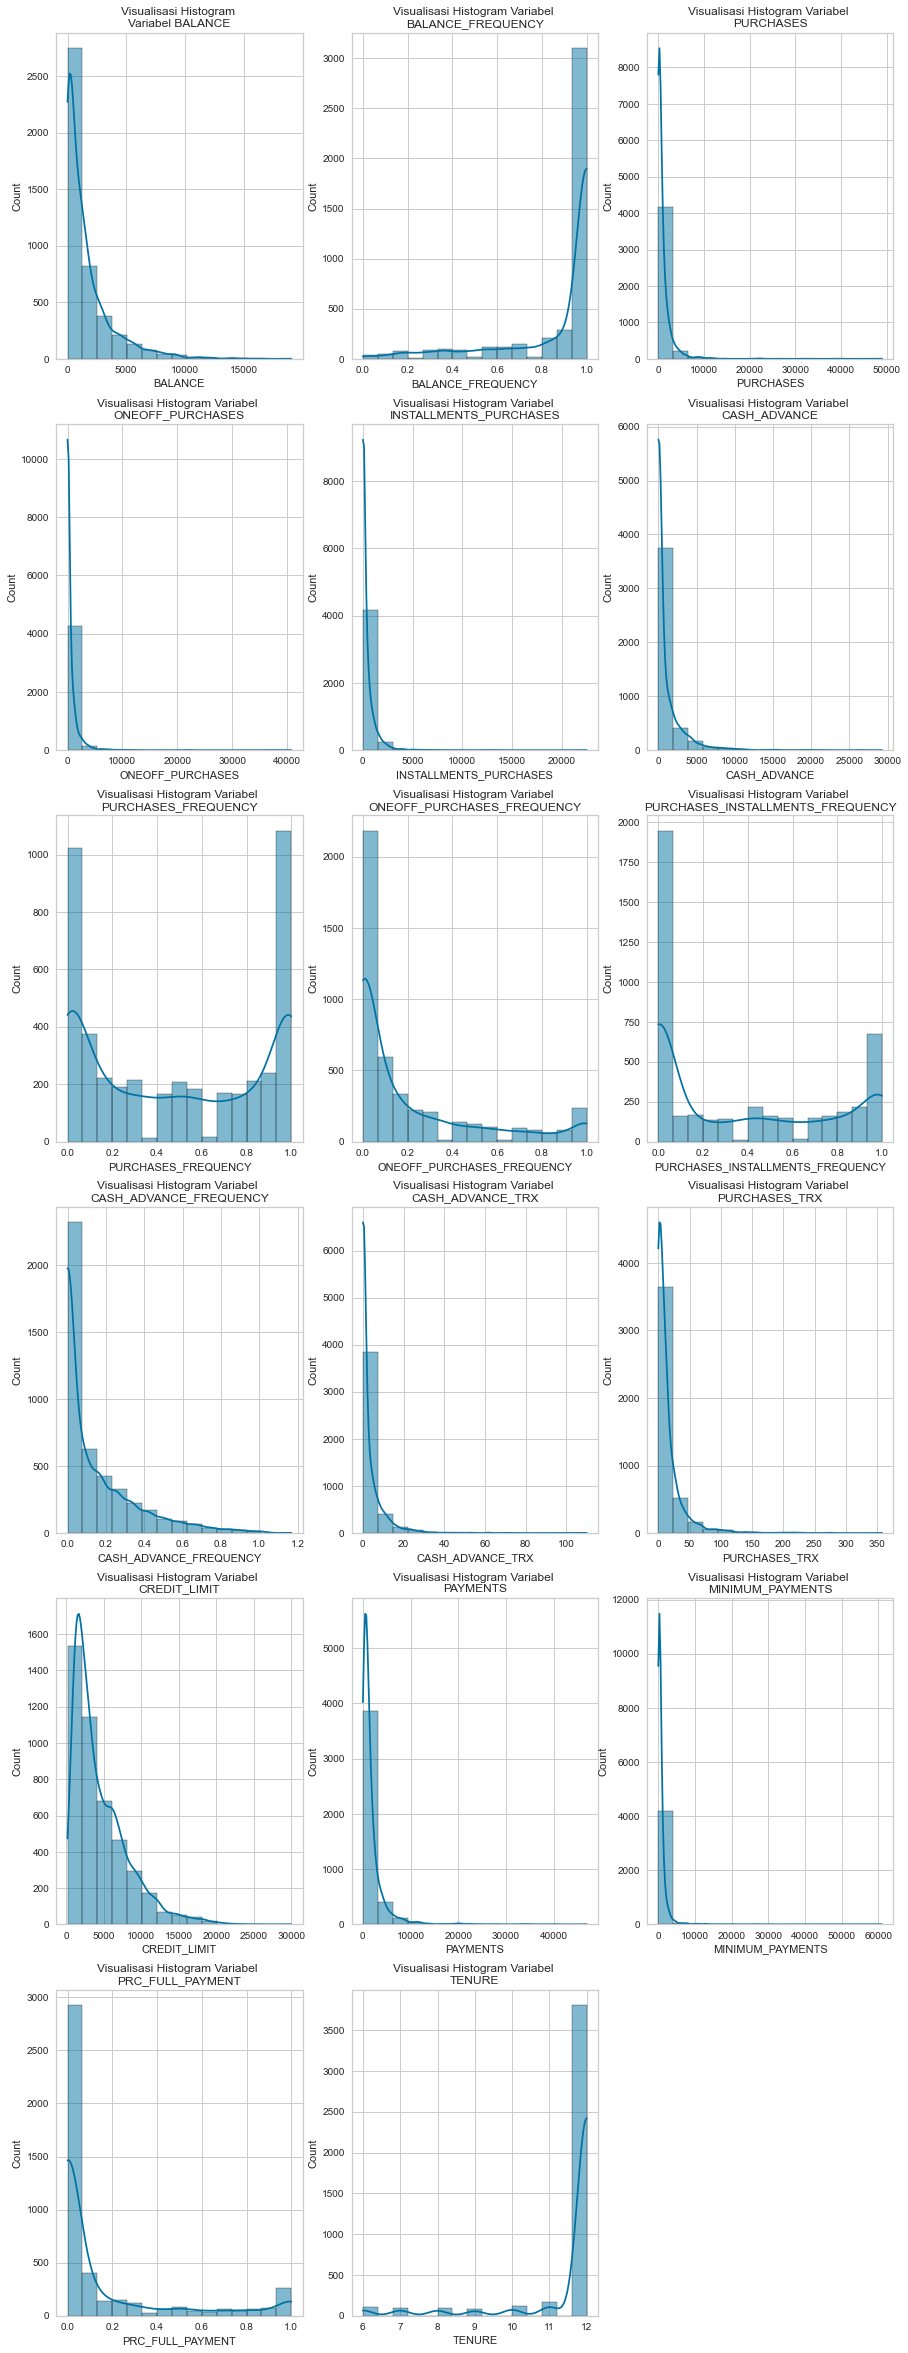

In [8]:
# Membuat visualisasi distribusi data melalui .histplot()

plt.figure(figsize=(15,42))

plt.subplot(6, 3, 1)
sns.histplot(data['BALANCE'], bins=15, kde=True)
plt.title('Visualisasi Histogram \nVariabel BALANCE')

plt.subplot(6, 3, 2)
sns.histplot(data['BALANCE_FREQUENCY'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nBALANCE_FREQUENCY')

plt.subplot(6, 3, 3)
sns.histplot(data['PURCHASES'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nPURCHASES')

plt.subplot(6, 3, 4)
sns.histplot(data['ONEOFF_PURCHASES'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nONEOFF_PURCHASES')

plt.subplot(6, 3, 5)
sns.histplot(data['INSTALLMENTS_PURCHASES'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nINSTALLMENTS_PURCHASES')

plt.subplot(6, 3, 6)
sns.histplot(data['CASH_ADVANCE'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nCASH_ADVANCE')

plt.subplot(6, 3, 7)
sns.histplot(data['PURCHASES_FREQUENCY'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nPURCHASES_FREQUENCY')

plt.subplot(6, 3, 8)
sns.histplot(data['ONEOFF_PURCHASES_FREQUENCY'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nONEOFF_PURCHASES_FREQUENCY')

plt.subplot(6, 3, 9)
sns.histplot(data['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nPURCHASES_INSTALLMENTS_FREQUENCY')

plt.subplot(6, 3, 10)
sns.histplot(data['CASH_ADVANCE_FREQUENCY'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nCASH_ADVANCE_FREQUENCY')

plt.subplot(6, 3, 11)
sns.histplot(data['CASH_ADVANCE_TRX'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nCASH_ADVANCE_TRX')

plt.subplot(6, 3, 12)
sns.histplot(data['PURCHASES_TRX'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nPURCHASES_TRX')

plt.subplot(6, 3, 13)
sns.histplot(data['CREDIT_LIMIT'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nCREDIT_LIMIT')

plt.subplot(6, 3, 14)
sns.histplot(data['PAYMENTS'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nPAYMENTS')

plt.subplot(6, 3, 15)
sns.histplot(data['MINIMUM_PAYMENTS'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nMINIMUM_PAYMENTS')

plt.subplot(6, 3, 16)
sns.histplot(data['PRC_FULL_PAYMENT'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nPRC_FULL_PAYMENT')

plt.subplot(6, 3, 17)
sns.histplot(data['TENURE'], bins=15, kde=True)
plt.title('Visualisasi Histogram Variabel \nTENURE')

plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa kolom `BALANCE`, `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `CASH_ADVANCE`, `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`, `PAYMENTS`, `MINIMUM_PAYMENTS`, dan `PRC_FULL_PAYMENT` tidak berdistribusi normal dan memiliki *tail* di sisi kanan atau disebut dengan istilah *right skewed distribution*. Sementara, kolom `TENURE` dan `BALANCE_FREQUENCY` juga tidak berdistribusi normal namun memiliki *tail* di sisi kiri atau disebut dengan *left skewed distribution*.

Adapun pada kolom `PURCHASES_FREQUENCY` berdistribusi normal namun peak nya tidak berada di mediannya.

<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

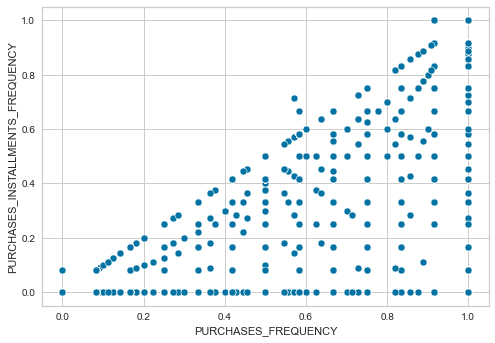

In [9]:
# Melakukan visualisasi hubungan frekuensi pembelian dengan dicicil terhadap frekuensi keseluruhan pembelian

sns.scatterplot(x=data['PURCHASES_FREQUENCY'], y=data['PURCHASES_INSTALLMENTS_FREQUENCY'])

<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='ONEOFF_PURCHASES_FREQUENCY'>

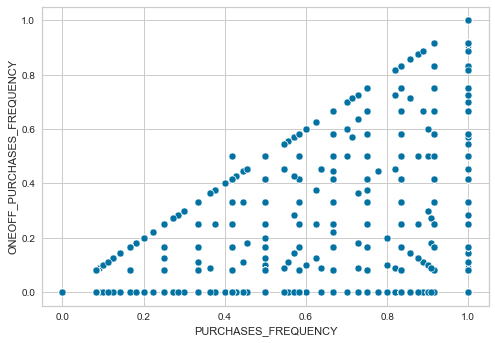

In [10]:
# Melakukan visualisasi hubungan frekuensi pembelian tanpa dicicil terhadap frekuensi keseluruhan pembelian

sns.scatterplot(x=data['PURCHASES_FREQUENCY'], y=data['ONEOFF_PURCHASES_FREQUENCY'])

Berdasarkan sajian di atas, dapat dilihat bahwa terdapat 4 nasabah yang frekuensi pembelian yang dilakukan secara dicicil `PURCHASES_INSTALLMENTS_FREQUENCY` menggunakan CC melebihi frekuensi pembelian `PURCHASES_FREQUENCY` dan terdapat 1 nasabah yang frekuensi pembelian dilakukan langsung tanpa dicicil `ONEOFF_PURCHASES_FREQUENCY` lmenggunakan CC melebih frekuensi pembeliannya. 5 data nasabah tersebut patut diduga terjadi error dalam rekap atau indikasi lain yaitu bug pada sistem karena rasio frekuensinya melebih 1 (tidak mungkin seharusnya terjadi).

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='CASH_ADVANCE'>

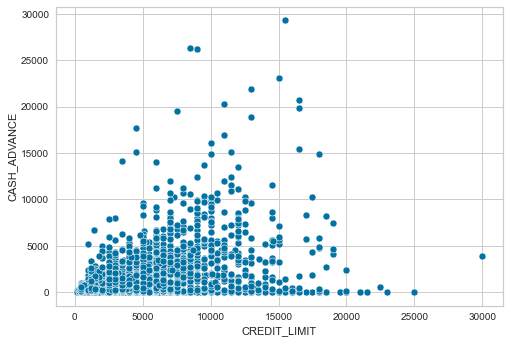

In [11]:
# Melakukan visualisasi hubungan pengambilan tarik tunai terhadap limit CC

sns.scatterplot(x=data['CREDIT_LIMIT'], y=data['CASH_ADVANCE'])

Berdasarkan sajian di atas, dapat dilihat bahwa terdapat 7 nasabah yang menggunakan CC melebihi batas limitnya, hal ini ditunjukan pada nasabah yang `CREDIT_LIMIT` nya kurang dari 20,000 tetapi menggunakannya untuk tarik tunai ditunjukan pada `CASH_ADVANCE` yang melebih nilai limit 20,000 dengan rentang kelebihan yang bervariasi. 

Selain itu, dari 7 nasabah tersebut terdapat 1 nasabah yang menggunakan CC nya melebihi kewajaran dari *overlimit* nya, yaitu dengan limit sekitar 15,000 menggunakan untuk tarik tunai sekitar 30,000 (hampir 2x lipat limitnya) dan terdapat 2 nasabah yang menggunakan CC nya melebihi kewajaran dari *overlimit* nya, yaitu dengan limit sekitar 9,000 menggunakan untuk tarik tunai sekitar 26,000 (hampir 3x lipat limitnya)

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='PURCHASES'>

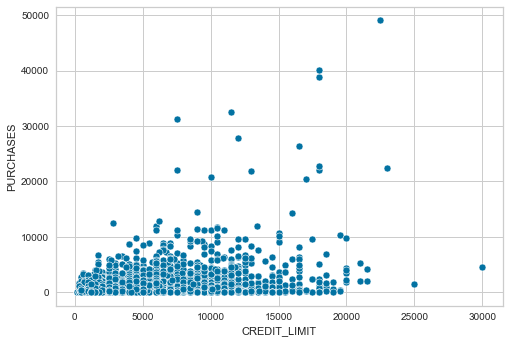

In [12]:
# Melakukan visualisasi hubungan pengunaan untuk belanja terhadap limit CC

sns.scatterplot(x=data['CREDIT_LIMIT'], y=data['PURCHASES'])

Berdasarkan sajian di atas, dapat dilihat bahwa terdapat 12 nasabah yang menggunakan CC melebihi batas limitnya, hal ini ditunjukan pada nasabah yang `CREDIT_LIMIT` nya kurang dari 20,000 tetapi menggunakannya untuk belanja ditunjukan pada `PURCHASES` yang melebih nilai 20,000 dengan rentang kelebihan yang bervariasi yaitu sebanyak 8 nasabah yang kelebihan 0-10,000, sebanyak 4 nasabah yang kelebihan 10,000-20,000 (2x lipat dari limit CC-nya). Selain itu, terdapat 1 nasabah yang patut diduga menggunakan CC nya melebih kewajaran dari *overlimit* nya, yaitu dengan limit sekitar 23,000 menggunakan untuk belanja sebesar 50,000.

Secara umum, nasabah menggunakan CC-nya dibawah limitnya. Terdapat 2 nasaah yaitu yang memiliki CC limit 25,000 dan 30,000 terlihat jumlah pembelian `PURCHASES`-nya masih sangat sedikit, dapat dikatakan jarang dipakai atau menggunakan untuk pembelian yang murah (jauh lebih rendah dari limit-nya).

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

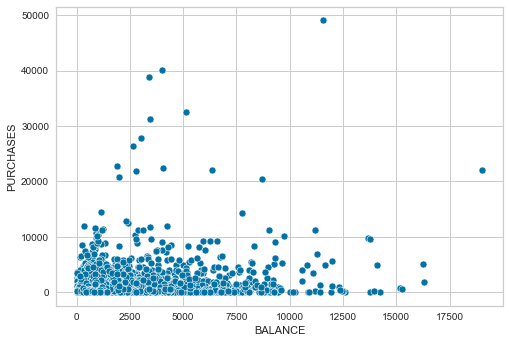

In [13]:
# Melakukan visualisasi hubungan pengunaan untuk belanja terhadap sisa balance di CC

sns.scatterplot(x=data['BALANCE'], y=data['PURCHASES'])

Berdasarkan sajian di atas, dapat dilihat bahwa terdapat 12 nasabah yang menggunakan CC melebihi sisa saldo CCnya sebesar 2x lipatnya, hal ini ditunjukan pada nasabah yang `BALANCE` nya kurang dari 10,000 tetapi menggunakannya untuk belanja ditunjukan pada `PURCHASES` yang melebih nilai 20,000. 

Selain itu, terdapat 1 nasabah yang menggunakan C melebihi sisa saldo CCnya sebsar 4x lipatnya, hal ini ditunjukan pada nasabah yang `BALANCE` sekitar 11,500 menggunakannya untuk belanja hingga 50,000.

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='PAYMENTS'>

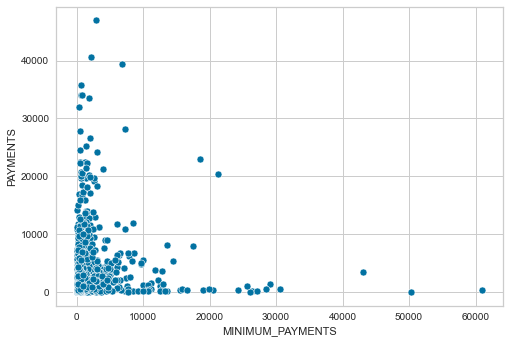

In [14]:
# Melakukan visualisasi hubungan pembayaran tagihan terhadap minimum pembayaran tagihannya

sns.scatterplot(x=data['MINIMUM_PAYMENTS'], y=data['PAYMENTS'])

Berdasarkan sajian di atas, dapat dilihat bahwa secara umum pembayaran `PAYMENTS` yang dilakukan oleh nasabah sudah di atas nilai minimum pembayarannya `MINIMUM_PAYMENTS`, hal ini dapat dilihat bahwa minimum pembayaran pada rentang 0- 5000 data berkumpul secara vertikal pada sebaran nilai `PAYMENTS`.

Namun, masih dapat dijumpai kelompok nasabah yang `MINIMUM_PAYMENTS` misalnya 50,000 dan 60,000 justru tidak melakukan pembayaran sama sekali.

In [15]:
# Melakukan pengelompokan dan agregasi pada variabel 'creatinine_phosphokinase' terhadap 'DEATH_EVENT'

data.groupby(by=['TENURE'])[['INSTALLMENTS_PURCHASES']].mean().sort_values(by='TENURE',ascending=False)

INSTALLMENTS_PURCHASES
TENURE                        
12                  455.788340
11                  206.835181
10                  235.999825
9                   205.640909
8                   139.524227
7                   152.291000
6                   135.466311

Berdasarkan sajian di atas, dapat dilihat bahwa rata-rata pembelian yang dilakukan secara dicicil memiliki hubungan berbanding lurus, artinya semakin besar rata-rata cicilannya, semakin panjang `TENURE` cicilannya. Sebagai contoh tenor 12 bulan, rata-rata `INSTALLMENTS_PURCHASES`nya 455,7 sementara tenor yang lebih pendek 6 bulan rata-rata  `INSTALLMENTS_PURCHASES`nya 135,5.

## 5- Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Get Data for Model Inference

In [16]:
# Memisahkan data untuk inference

data_inf = data.sample(15, random_state=25)
data_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
126        98  2196.006333           1.000000     666.89            550.79   
2280     6846   328.686581           1.000000    2806.78           2588.53   
1903     8718  1258.769693           1.000000     142.00             42.00   
2558     5508  2173.621597           1.000000     200.00            200.00   
3205     1582    45.785125           0.636364      12.00              0.00   
1346     5856   711.922203           0.818182     197.21            197.21   
3128     8512   289.220297           1.000000       0.00              0.00   
2550     2250   342.761070           1.000000      20.00             20.00   
3182     3376  4484.839808           1.000000     591.30              0.00   
2435     6144  1265.805627           0.818182       0.00              0.00   
3050     5952   675.117139           0.181818       0.00              0.00   
2908     5646  1175.241984           1.000000    1102.72           1102.72   
3393     2576   606.246031           0.909091    3876.00           2380.00   
3803     3200   266.475852           0.272727       0.00              0.00   
185      4320   629.946336           1.000000    1832.92           1832.92   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
126                   116.10      0.000000             0.500000   
2280                  218.25      0.000000             0.857143   
1903                  100.00      0.000000             0.166667   
2558                    0.00    201.404735             0.083333   
3205                   12.00    166.160258             1.000000   
1346                    0.00      0.000000             0.083333   
3128                    0.00   1048.868332             0.000000   
2550                    0.00    148.074839             0.083333   
3182                  591.30   1402.722044             0.750000   
2435                    0.00   2820.528417             0.000000   
3050                    0.00   6523.780195             0.000000   
2908                    0.00    136.401822             0.571429   
3393                 1496.00    914.843621             0.833333   
3803                    0.00   1560.735908             0.000000   
185                     0.00      0.000000             0.500000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
126                     0.250000                          0.166667   
2280                    0.714286                          0.285714   
1903                    0.083333                          0.083333   
2558                    0.083333                          0.000000   
3205                    0.000000                          0.916667   
1346                    0.083333                          0.000000   
3128                    0.000000                          0.000000   
2550                    0.083333                          0.000000   
3182                    0.000000                          0.750000   
2435                    0.000000                          0.000000   
3050                    0.000000                          0.000000   
2908                    0.571429                          0.000000   
3393                    0.166667                          0.750000   
3803                    0.000000                          0.000000   
185                     0.500000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
126                 0.000000                 0              8        7500.0   
2280                0.000000                 0             26        1200.0   
1903                0.000000                 0              2        1200.0   
2558                0.250000                 4              1        8000.0   
3205                0.083333                 3             12        1200.0   
1346                0.000000                 0              1        1500.0   
3128      

In [17]:
data_inf.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    1
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
data_inf = data_inf.dropna()

In [19]:
data_inf.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
# Memisahkan Inference Set from Dataset 

data_cluster = data.drop(data_inf.index)
data_cluster

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

In [21]:
# Mengatur ulang bacaan index pada Inference Set & Cluster Set (untuk meminimalisasi kesalahan akibat index)

data_cluster.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Splitting Dataset

In [22]:
# Memisahkan dataset 'data_cluster' dari feature yang bukan numerik

X = data_cluster.drop('CUST_ID', axis=1)

In [23]:
# Menampilkan 'X' yang telah dipisahkan dari feature yang bukan numerik

X

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           0.125000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.125000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4456  1079.008102           1.000000       0.00              0.00   
4457   809.582978           0.909091       0.00              0.00   
4458  3386.490883           1.000000     560.98            427.22   
4459  4840.545574           1.000000    1595.93           1595.93   
4460  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4456                    0.00   1259.571764             0.000000   
4457                    0.00   3819.672466             0.000000   
4458                  133.76   2008.153534             1.000000   
4459                    0.00   4359.325750             0.454545   
4460                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4456                    0.000000                          0.000000   
4457                    0.000000                          0.000000   
4458                    0.727273                          0.363636   
4459                    0.454545                          0.000000   
4460                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4456                0.545455                 9              0        1200.0   
4457                0.545455                 7              0        4150.0   
4458                0.545455                 9             20       10100.0   
4459                0.545455                17             25        6000.0   
4460                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4456  1379.635287        271.364415          0.090909      11  
4457  4372.148648        241.645387          0.090909      11  
4458  1039

### Handling Missing Values

In [24]:
# Memeriksa jumlah isnull pada variabel

X.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [25]:
missing_value = X[(X['CREDIT_LIMIT'].isnull() == True) | (X['MINIMUM_PAYMENTS'].isnull() == True)]
missing_value.shape[0]

159

In [26]:
print('% data yang hilang adalah sebanyak :', format(missing_value.shape[0]/data.shape[0] * 100))

% data yang hilang adalah sebanyak : 3.553072625698324


Dengan mempertimbangkan bahwa kehilangan data pada kolom `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS` adalah bersifat MCAR (*missing completely at random*) dan persentase kehilangan data adalah 3,55% (dapat diasumsikan kecil karena < 10%), sehingga metode *handling missing value* yang dapat dilakukan pada kasus ini adalah dengan CCA, yaitu dengan mengeluarkan baris yang datanya hilang.

In [27]:
X.shape

(4461, 17)

In [28]:
# Membuang baris yang terdapat missing value-nya

X.drop(missing_value.index.tolist(), axis=0, inplace=True)

In [29]:
X.shape

(4302, 17)

### Handling Outliers

In [30]:
# Menampilkan nilai ketidaksimetrisan (skewness value) pada 'X'

X.skew()

BALANCE                              2.438581
BALANCE_FREQUENCY                   -2.083098
PURCHASES                            8.898547
ONEOFF_PURCHASES                    10.043018
INSTALLMENTS_PURCHASES               8.024190
CASH_ADVANCE                         4.707823
PURCHASES_FREQUENCY                  0.034483
ONEOFF_PURCHASES_FREQUENCY           1.494315
PURCHASES_INSTALLMENTS_FREQUENCY     0.484431
CASH_ADVANCE_FREQUENCY               1.787367
CASH_ADVANCE_TRX                     4.715797
PURCHASES_TRX                        4.424860
CREDIT_LIMIT                         1.525775
PAYMENTS                             5.979006
MINIMUM_PAYMENTS                    12.364198
PRC_FULL_PAYMENT                     1.849743
TENURE                              -3.001455
dtype: float64

In [31]:
# Membuat fungsi def find_skewed_boundaries() untuk fitur 'X' yang tidak berdistribusi normal untuk memncari nilai batas atas dan batas bawah menggunakan metode Tukey's Rule atau IQR

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [32]:
# Membuat fungsi def find_normal_boundaries() untuk fitur 'X' yang berdistribusi normal untuk memncari nilai batas atas dan batas bawah menggunakan metode Z-Score

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [33]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [34]:
# Memisahkan fitur 'X' yang berdistribusi normal dan fitur 'X' yang tidak berdistribusi normal berdasarkan nilai skew()

norm_columns = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
skew_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
                'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
                'TENURE']

X_norm = X[norm_columns]
X_skew = X[skew_columns]

In [35]:
# Mendefinisikan nilai ekstrem (outlier) pada X_norm dimana skewness value-nya (-0.5 < skew() < 0.5)

# Nilai batas 'PURCHASES_FREQUENCY'
upper_PURCHASES_FREQUENCY, lower_PURCHASES_FREQUENCY = find_normal_boundaries(X_norm, 'PURCHASES_FREQUENCY')

# Nilai batas 'PURCHASES_INSTALLMENTS_FREQUENCY'
upper_PURCHASES_INSTALLMENTS_FREQUENCY, lower_PURCHASES_INSTALLMENTS_FREQUENCY = find_normal_boundaries(X_norm, 'PURCHASES_INSTALLMENTS_FREQUENCY')

In [36]:
outliers_norm1 = np.where(X_norm['PURCHASES_FREQUENCY'] > upper_PURCHASES_FREQUENCY, True,
                       np.where(X_norm['PURCHASES_FREQUENCY'] < lower_PURCHASES_FREQUENCY, True, False))

outliers_norm2 = np.where(X_norm['PURCHASES_INSTALLMENTS_FREQUENCY'] > upper_PURCHASES_INSTALLMENTS_FREQUENCY, True,
                       np.where(X_norm['PURCHASES_INSTALLMENTS_FREQUENCY'] < lower_PURCHASES_INSTALLMENTS_FREQUENCY, True, False))


In [37]:
# Melakukan pemangkasan data yang mengandung outliers pada X_skew

X_norm_trimmed = X_norm.loc[~(outliers_norm1 + outliers_norm2)]
print('Dimensi dataset X_norm - sebelum dipangkas : ', X_norm.shape)
print('Dimensi dataset X_norm - sesudah dipangkas : ', X_norm_trimmed.shape)

Dimensi dataset X_norm - sebelum dipangkas :  (4302, 2)
Dimensi dataset X_norm - sesudah dipangkas :  (4302, 2)


Tidak terdapat outliers pada kelompok fitur 'X_norm'

In [38]:
# Mendefinisikan nilai ekstrem (outlier) pada X_skew dimana skewness value-nya (skew() < -0.5 atau skew() >0.5), distance = 3 karena skew() > ±1.0

# Nilai batas 'BALANCE'
upper_BALANCE, lower_BALANCE = find_skewed_boundaries(X_skew, 'BALANCE', 3)

# Nilai batas 'BALANCE_FREQUENCY'
upper_BALANCE_FREQUENCY, lower_BALANCE_FREQUENCY = find_skewed_boundaries(X_skew, 'BALANCE_FREQUENCY', 3)

# Nilai batas 'PURCHASES'
upper_PURCHASES, lower_PURCHASES = find_skewed_boundaries(X_skew, 'PURCHASES', 3)

# Nilai batas 'ONEOFF_PURCHASES'
upper_ONEOFF_PURCHASES, lower_ONEOFF_PURCHASES = find_skewed_boundaries(X_skew, 'ONEOFF_PURCHASES', 3)

# Nilai batas 'INSTALLMENTS_PURCHASES'
upper_INSTALLMENTS_PURCHASES, lower_INSTALLMENTS_PURCHASES = find_skewed_boundaries(X_skew, 'INSTALLMENTS_PURCHASES', 3)

# Nilai batas 'CASH_ADVANCE'
upper_CASH_ADVANCE, lower_CASH_ADVANCE = find_skewed_boundaries(X_skew, 'CASH_ADVANCE', 3)

# Nilai batas 'ONEOFF_PURCHASES_FREQUENCY'
upper_ONEOFF_PURCHASES_FREQUENCY, lower_ONEOFF_PURCHASES_FREQUENCY = find_skewed_boundaries(X_skew, 'ONEOFF_PURCHASES_FREQUENCY', 3)

# Nilai batas 'CASH_ADVANCE_FREQUENCY'
upper_CASH_ADVANCE_FREQUENCY, lower_CASH_ADVANCE_FREQUENCY = find_skewed_boundaries(X_skew, 'CASH_ADVANCE_FREQUENCY', 3)

# Nilai batas 'CASH_ADVANCE_TRX'
upper_CASH_ADVANCE_TRX, lower_CASH_ADVANCE_TRX = find_skewed_boundaries(X_skew, 'CASH_ADVANCE_TRX', 3)

# Nilai batas 'PURCHASES_TRX'
upper_PURCHASES_TRX, lower_PURCHASES_TRX = find_skewed_boundaries(X_skew, 'PURCHASES_TRX', 3)

# Nilai batas 'CREDIT_LIMIT'
upper_CREDIT_LIMIT, lower_CREDIT_LIMIT = find_skewed_boundaries(X_skew, 'CREDIT_LIMIT', 3)

# Nilai batas 'PAYMENTS'
upper_PAYMENTS, lower_PAYMENTS = find_skewed_boundaries(X_skew, 'PAYMENTS', 3)

# Nilai batas 'MINIMUM_PAYMENTS'
upper_MINIMUM_PAYMENTS, lower_MINIMUM_PAYMENTS = find_skewed_boundaries(X_skew, 'MINIMUM_PAYMENTS', 3)

# Nilai batas 'PRC_FULL_PAYMENT'
upper_PRC_FULL_PAYMENT, lower_PRC_FULL_PAYMENT = find_skewed_boundaries(X_skew, 'PRC_FULL_PAYMENT', 3)

# Nilai batas 'TENURE'
upper_TENURE, lower_TENURE = find_skewed_boundaries(X_skew, 'TENURE', 3)


In [39]:
outliers_skew1 = np.where(X_skew['BALANCE'] > upper_BALANCE, True,
                       np.where(X_skew['BALANCE'] < lower_BALANCE, True, False))

outliers_skew2 = np.where(X_skew['BALANCE_FREQUENCY'] > upper_BALANCE_FREQUENCY, True,
                       np.where(X_skew['BALANCE_FREQUENCY'] < lower_BALANCE_FREQUENCY, True, False))

outliers_skew3 = np.where(X_skew['PURCHASES'] > upper_PURCHASES, True,
                       np.where(X_skew['PURCHASES'] < lower_PURCHASES, True, False))

outliers_skew4 = np.where(X_skew['ONEOFF_PURCHASES'] > upper_ONEOFF_PURCHASES, True,
                       np.where(X_skew['ONEOFF_PURCHASES'] < lower_ONEOFF_PURCHASES, True, False))

outliers_skew5 = np.where(X_skew['INSTALLMENTS_PURCHASES'] > upper_INSTALLMENTS_PURCHASES, True,
                       np.where(X_skew['INSTALLMENTS_PURCHASES'] < lower_INSTALLMENTS_PURCHASES, True, False))

outliers_skew6 = np.where(X_skew['CASH_ADVANCE'] > upper_CASH_ADVANCE, True,
                       np.where(X_skew['CASH_ADVANCE'] < lower_CASH_ADVANCE, True, False))

outliers_skew7 = np.where(X_skew['ONEOFF_PURCHASES_FREQUENCY'] > upper_ONEOFF_PURCHASES_FREQUENCY, True,
                       np.where(X_skew['ONEOFF_PURCHASES_FREQUENCY'] < lower_ONEOFF_PURCHASES_FREQUENCY, True, False))

outliers_skew8 = np.where(X_skew['CASH_ADVANCE_FREQUENCY'] > upper_CASH_ADVANCE_FREQUENCY, True,
                       np.where(X_skew['CASH_ADVANCE_FREQUENCY'] < lower_CASH_ADVANCE_FREQUENCY, True, False))

outliers_skew9 = np.where(X_skew['CASH_ADVANCE_TRX'] > upper_CASH_ADVANCE_TRX, True,
                       np.where(X_skew['CASH_ADVANCE_TRX'] < lower_CASH_ADVANCE_TRX, True, False))

outliers_skew10 = np.where(X_skew['PURCHASES_TRX'] > upper_PURCHASES_TRX, True,
                       np.where(X_skew['PURCHASES_TRX'] < lower_PURCHASES_TRX, True, False))

outliers_skew11 = np.where(X_skew['CREDIT_LIMIT'] > upper_CREDIT_LIMIT, True,
                       np.where(X_skew['CREDIT_LIMIT'] < lower_CREDIT_LIMIT, True, False))

outliers_skew12 = np.where(X_skew['PAYMENTS'] > upper_PAYMENTS, True,
                       np.where(X_skew['PAYMENTS'] < lower_PAYMENTS, True, False))

outliers_skew13 = np.where(X_skew['MINIMUM_PAYMENTS'] > upper_MINIMUM_PAYMENTS, True,
                       np.where(X_skew['MINIMUM_PAYMENTS'] < lower_MINIMUM_PAYMENTS, True, False))

outliers_skew14 = np.where(X_skew['PRC_FULL_PAYMENT'] > upper_PRC_FULL_PAYMENT, True,
                       np.where(X_skew['PRC_FULL_PAYMENT'] < lower_PRC_FULL_PAYMENT, True, False))

outliers_skew15 = np.where(X_skew['TENURE'] > upper_TENURE, True,
                       np.where(X_skew['TENURE'] < lower_TENURE, True, False))


In [40]:
# Melakukan pemangkasan data yang mengandung outliers pada X_skew

X_skew_trimmed = X_skew.loc[~(outliers_skew1 + outliers_skew2 + outliers_skew3 + outliers_skew4
                             + outliers_skew5 + outliers_skew6 + outliers_skew7 + outliers_skew8
                             + outliers_skew9 + outliers_skew10 + outliers_skew11 + outliers_skew12
                             + outliers_skew13 + outliers_skew14 + outliers_skew15)]
print('Dimensi dataset X_skew - sebelum dipangkas : ', X_skew.shape)
print('Dimensi dataset X_skew - sesudah dipangkas : ', X_skew_trimmed.shape)

Dimensi dataset X_skew - sebelum dipangkas :  (4302, 15)
Dimensi dataset X_skew - sesudah dipangkas :  (2292, 15)


Apabila dilakuka pemangkasan terhadap data yang memiliki nilai outliers maka akan kehilang data sekitar ~46,7%, dimana nilai tersebut sangat besar. Maka, handling outliers yang paling tepat ialah dengan melakukan capping menggunakan *winsorizer()*

In [41]:
# Melakukan metode capping menggunakan windsoriser() to mengatur sedemikian rupa sehingga nilai ekstrem pada 'X_skew' berada di nilai batas atasnya (IQR, fold 3, dipilih karena nilai skewnessnya > 1.0)

winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3, 
                        variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                      'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                      'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                      'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                      'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

winsorizer.fit(X_skew)

Winsorizer(capping_method='iqr', tail='both',
           variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                      'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                      'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                      'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                      'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

In [42]:
# Malakukan transformasi menggunakan winsorizer untuk nilai ekstrem tersebut pada X_skew

X_skew = winsorizer.transform(X_skew)

Pada kolom `TENURE` tidak dilakukan capping karena akan menjadikan nilainya seragam = 12.

In [43]:
# Memeriksa kembali nilai yang telah dilakukan metode capping tadi pada informasi deskriptif statistik describe()

X_skew.describe().T

count         mean          std         min  \
BALANCE                     4302.0  1553.275599  1901.260940    0.000000   
BALANCE_FREQUENCY           4302.0     0.923902     0.133218    0.636364   
PURCHASES                   4302.0   859.484068  1159.518631    0.000000   
ONEOFF_PURCHASES            4302.0   438.750567   704.877879    0.000000   
INSTALLMENTS_PURCHASES      4302.0   359.112706   538.251311    0.000000   
CASH_ADVANCE                4302.0   798.787736  1317.969807    0.000000   
ONEOFF_PURCHASES_FREQUENCY  4302.0     0.205527     0.299446    0.000000   
CASH_ADVANCE_FREQUENCY      4302.0     0.136245     0.200375    0.000000   
CASH_ADVANCE_TRX            4302.0     2.804974     4.440607    0.000000   
PURCHASES_TRX               4302.0    13.197815    16.732260    0.000000   
CREDIT_LIMIT                4302.0  4524.859661  3672.557786  150.000000   
PAYMENTS                    4302.0  1534.460563  1654.698583    4.841543   
MINIMUM_PAYMENTS            4302.0   639.950904   728.535819    0.037744   
PRC_FULL_PAYMENT            4302.0     0.136067     0.231713    0.000000   
TENURE                      4302.0    11.532311     1.322898    6.000000   

                                    25%          50%          75%  \
BALANCE                      152.306307   916.855459  2112.574821   
BALANCE_FREQUENCY              0.909091     1.000000     1.000000   
PURCHASES                     45.000000   379.660000  1149.980000   
ONEOFF_PURCHASES               0.000000    35.470000   600.000000   
INSTALLMENTS_PURCHASES         0.000000    96.250000   498.990000   
CASH_ADVANCE                   0.000000     0.000000  1110.621451   
ONEOFF_PURCHASES_FREQUENCY     0.000000     0.083333     0.333333   
CASH_ADVANCE_FREQUENCY         0.000000     0.000000     0.250000   
CASH_ADVANCE_TRX               0.000000     0.000000     4.000000   
PURCHASES_TRX                  1.000000     7.000000    17.000000   
CREDIT_LIMIT                1500.000000  3000.000000  6500.000000   
PAYMENTS                     428.128384   875.578890  1960.368584   
MINIMUM_PAYMENTS             169.805948   310.519089   832.870055   
PRC_FULL_PAYMENT               0.000000     0.000000     0.166667   
TENURE                        12.000000    12.000000    12.000000   

                                     max  
BALANCE                      7993.380366  
BALANCE_FREQUENCY               1.000000  
PURCHASES                    4464.920000  
ONEOFF_PURCHASES             2400.000000  
INSTALLMENTS_PURCHASES       1995.960000  
CASH_ADVANCE                 4442.485803  
ONEOFF_PURCHASES_FREQUENCY      1.000000  
CASH_ADVANCE_FREQUENCY          1.000000  
CASH_ADVANCE_TRX               16.000000  
PURCHASES_TRX                  65.000000  
CREDIT_LIMIT                21500.000000  
PAYMENTS                     6557.089185  
MINIMUM_PAYMENTS             2822.062376  
PRC_FULL_PAYMENT                0.666668  
TENURE                         12.000000

### Feature Scaling

In [44]:
# Menampilkan X_norm

X_norm

PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY
1                0.125000                          0.000000
3                0.125000                          0.000000
4                0.125000                          0.000000
5                0.125000                          0.000000
7                0.125000                          0.000000
...                   ...                               ...
4456             0.000000                          0.000000
4457             0.000000                          0.000000
4458             1.000000                          0.363636
4459             0.454545                          0.000000
4460             0.909091                          0.818182

[4302 rows x 2 columns]

In [45]:
# Melakukan normalisasi (feature scaling) pada X_norm menggunakan StandardScaler()

normscaler = StandardScaler()
normscaler.fit(X_norm)

X_norm_scaled = normscaler.transform(X_norm)

In [46]:
# Menampilkan X_skew

X_skew

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.636364    1200.00           1200.00   
...           ...                ...        ...               ...   
4456  1079.008102           1.000000       0.00              0.00   
4457   809.582978           0.909091       0.00              0.00   
4458  3386.490883           1.000000     560.98            427.22   
4459  4840.545574           1.000000    1595.93           1595.93   
4460  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
1                       0.00      0.000000                    0.125000   
3                       0.00      0.000000                    0.125000   
4                       0.00      0.000000                    0.125000   
5                       0.00      0.000000                    0.125000   
7                       0.00      0.000000                    0.125000   
...                      ...           ...                         ...   
4456                    0.00   1259.571764                    0.000000   
4457                    0.00   3819.672466                    0.000000   
4458                  133.76   2008.153534                    0.727273   
4459                    0.00   4359.325750                    0.454545   
4460                  805.14   4335.919227                    0.090909   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000               0.0            1.0        1000.0   
3                   0.000000               0.0            1.0        1000.0   
4                   0.000000               0.0            1.0        1500.0   
5                   0.000000               0.0            1.0        2500.0   
7                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
4456                0.545455               9.0            0.0        1200.0   
4457                0.545455               7.0            0.0        4150.0   
4458                0.545455               9.0           20.0       10100.0   
4459                0.545455              16.0           25.0        6000.0   
4460                0.545455              16.0           17.0        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1      215.325023        410.484825          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
5      343.102984        712.986387          0.000000       8  
7       57.266292         56.720210          0.000000       8  
...           ...               ...               ...     ...  
4456  1379.635287        271.364415          0.090909      11  
4457  4372.148648        241.645387          0.090909      11  
4458  1039.000037        886.050237          0.000000      11  
4459   905.844846       2376.919568          0.090909      11  
4460  3056.424974        910.707525          0.090909      11  

[4302 rows x 15 columns]

In [47]:
# Melakukan normalisasi (feature scaling) pada X_skew menggunakan MinMaxScaler()

skewscaler = MinMaxScaler()
skewscaler.fit(X_skew)

X_skew_scaled = skewscaler.transform(X_skew)

### Concating between normal & skewed Numerical Columns 

In [48]:
# Menggabungkan kembali fitur yang telah dilakukan normalisasi

X_final = np.concatenate([X_norm_scaled, X_skew_scaled], axis=1)

In [49]:
# Mengubah bentuk `X_train_final` ke dalam dataframe

X_final_df = pd.DataFrame(X_final, columns=[norm_columns + skew_columns])
X_final_df

PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY   BALANCE  \
0              -0.928477                        -0.929782  0.118046   
1              -0.928477                        -0.929782  0.057730   
2              -0.928477                        -0.929782  0.131808   
3              -0.928477                        -0.929782  0.279886   
4              -0.928477                        -0.929782  0.053168   
...                  ...                              ...       ...   
4297           -1.241284                        -0.929782  0.134988   
4298           -1.241284                        -0.929782  0.101282   
4299            1.261171                        -0.016788  0.423662   
4300           -0.103805                        -0.929782  0.605569   
4301            1.033676                         1.124458  0.247331   

     BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES INSTALLMENTS_PURCHASES  \
0              0.65625  0.023069         0.042917               0.000000   
1              1.00000  0.131021         0.243750               0.000000   
2              1.00000  0.324754         0.604167               0.000000   
3              1.00000  0.026876         0.050000               0.000000   
4              0.00000  0.268762         0.500000               0.000000   
...                ...       ...              ...                    ...   
4297           1.00000  0.000000         0.000000               0.000000   
4298           0.75000  0.000000         0.000000               0.000000   
4299           1.00000  0.125642         0.178008               0.067015   
4300           1.00000  0.357438         0.664971               0.000000   
4301           1.00000  0.231144         0.094542               0.403385   

     CASH_ADVANCE ONEOFF_PURCHASES_FREQUENCY CASH_ADVANCE_FREQUENCY  \
0        0.000000                   0.125000               0.000000   
1        0.000000                   0.125000               0.000000   
2        0.000000                   0.125000               0.000000   
3        0.000000                   0.125000               0.000000   
4        0.000000                   0.125000               0.000000   
...           ...                        ...                    ...   
4297     0.283529                   0.000000               0.545455   
4298     0.859805                   0.000000               0.545455   
4299     0.452034                   0.727273               0.545455   
4300     0.981281                   0.454545               0.545455   
4301     0.976012                   0.090909               0.545455   

     CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  PAYMENTS MINIMUM_PAYMENTS  \
0              0.0000      0.015385     0.039813  0.032124         0.145444   
1              0.0000      0.015385     0.039813  0.038642         0.053741   
2              0.0000      0.015385     0.063232  0.059865         0.080476   
3              0.0000      0.015385     0.110070  0.051625         0.252637   
4              0.0000      0.015385     0.049180  0.008001         0.020086   
...               ...           ...          ...       ...              ...   
4297           0.5625      0.000000     0.049180  0.209820         0.096146   
4298           0.4375      0.000000     0.187354  0.666536         0.085615   
4299           0.5625      0.307692     0.466042  0.157833         0.313963   
4300           1.0000      0.384615     0.274005  0.137511         0.842261   
4301           1.0000      0.261538     0.180328  0.465731         0.322701   

     PRC_FULL_PAYMENT    TENURE  
0            0.000000  0.333333  
1            0.000000  0.333333  
2            0.000000  0.333333  
3            0.000000  0.333333  
4            0.000000  0.333333  
...               ...       ...  
4297         0.136363  0.833333  
4298         0.136363  0.833333  
4299         0.000000  0.833333  
4300         0.136363  0.833333  
4301         0.136363  0.833333  

[4302 rows x 17 columns]

### Checking Variance Inflation Factors (VIF)

In [50]:
merged_columns = norm_columns + skew_columns

In [51]:
# Memeriksa keterkaitan korelasi antar variabel bebas pada X 'features'

vif = pd.DataFrame()
vif['Features'] = merged_columns
vif['VIF'] = [variance_inflation_factor(X_final_df.values, i) for i in range(X_final_df.shape[1])]

vif

Features        VIF
0                PURCHASES_FREQUENCY  10.875005
1   PURCHASES_INSTALLMENTS_FREQUENCY  11.766776
2                            BALANCE   8.003179
3                  BALANCE_FREQUENCY   7.147589
4                          PURCHASES  36.788179
5                   ONEOFF_PURCHASES  20.202106
6             INSTALLMENTS_PURCHASES  11.502243
7                       CASH_ADVANCE   4.508281
8         ONEOFF_PURCHASES_FREQUENCY   9.024106
9             CASH_ADVANCE_FREQUENCY   8.690593
10                  CASH_ADVANCE_TRX   9.323557
11                     PURCHASES_TRX   8.584763
12                      CREDIT_LIMIT   4.743666
13                          PAYMENTS   3.974903
14                  MINIMUM_PAYMENTS   5.252521
15                  PRC_FULL_PAYMENT   1.855409
16                            TENURE   8.573191

Terdapat 'rule of thumb' dalam mengintepretasikan hasil nilai VIF sebagai berikut:
- 1 — features tidak berkorelasi terhadap sesama features lainnya
- 1 < VIF < 5 — features berkorelasi cukup terhadap sesama features lainnya
- VIF > 5 — features berkorelasi kuat terhadap sesama features lainnya
- VIF > 10 — features berkorelasi sangat kuat terhadap sesama features lainnya

Apabila nilai VIF > 10, maka menjadi sinyal pertanda model memiliki permasalahan multikolinieritas, dimana menyalahi asumsi dasar dalam regresi. VIF > 5 pun patut dicurigai memiliki permasalahan yang serupa terkait multikolinieritas.

Berdasarkan nilai VIF di atas, setidaknya terdapat 4 *features* yang nilai VIF nya < 5 atau nilainya tidak saling berkaitan satu sama lain, yaitu `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS`, dan `PRC_FULL_PAYMENT`. Maka praduga awal jumlah dimensi setalah dilakukan *dimensionality reduction* ialah setidaknya 4 *features*. Namun perlu dilakukan prosedur pemeriksaan mendetail terkait PCA-nya.

### Dimensionality Reduction

In [57]:
# Melakukan dimensionality reduction berdasarkan kriteria keterwakilan informasi sebesar 85% yang dianggap sudah cukup representatif
pca = PCA()
pca.fit(X_final)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.85) + 1
d

4

In [58]:
pca = PCA(n_components = 4)
pca.fit(X_final)

pca.explained_variance_ratio_

array([0.64946312, 0.09101392, 0.0795491 , 0.04442878])

In [59]:
# Memeriksa jumlah EVR PCA n_components = 4

0.64946312 + 0.09101392 + 0.0795491 + 0.04442878

0.86445492

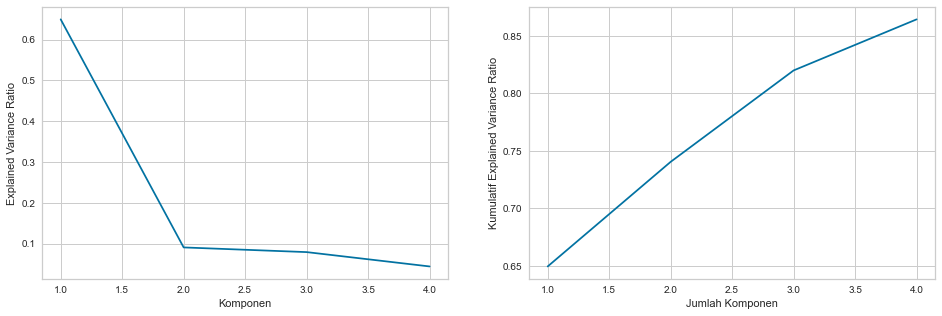

In [60]:
# Visualisasi nilai EVR berdasarkan banyak komponen

fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,5),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,5),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Variance Ratio')
plt.show()

Berdasarkan visualisasi plot EVR di atas, dapat dilihat bahwa terdapat patahan di 2 komponen, namun den gan cumsum EVR 0.74, dianggap masih belum cukup optimal keterwakilannya. Sementara, dengan 4 komponen merupakan jumlah yang terbaik dengan cumsum EVR sekitar 85%.

In [61]:
# Melakukan transformasi PCA dengan n_components=4 pada X_final untuk prosedur clustering selanjutnya

X_reduced = pca.transform(X_final)

In [62]:
X_reduced.shape

(4302, 4)

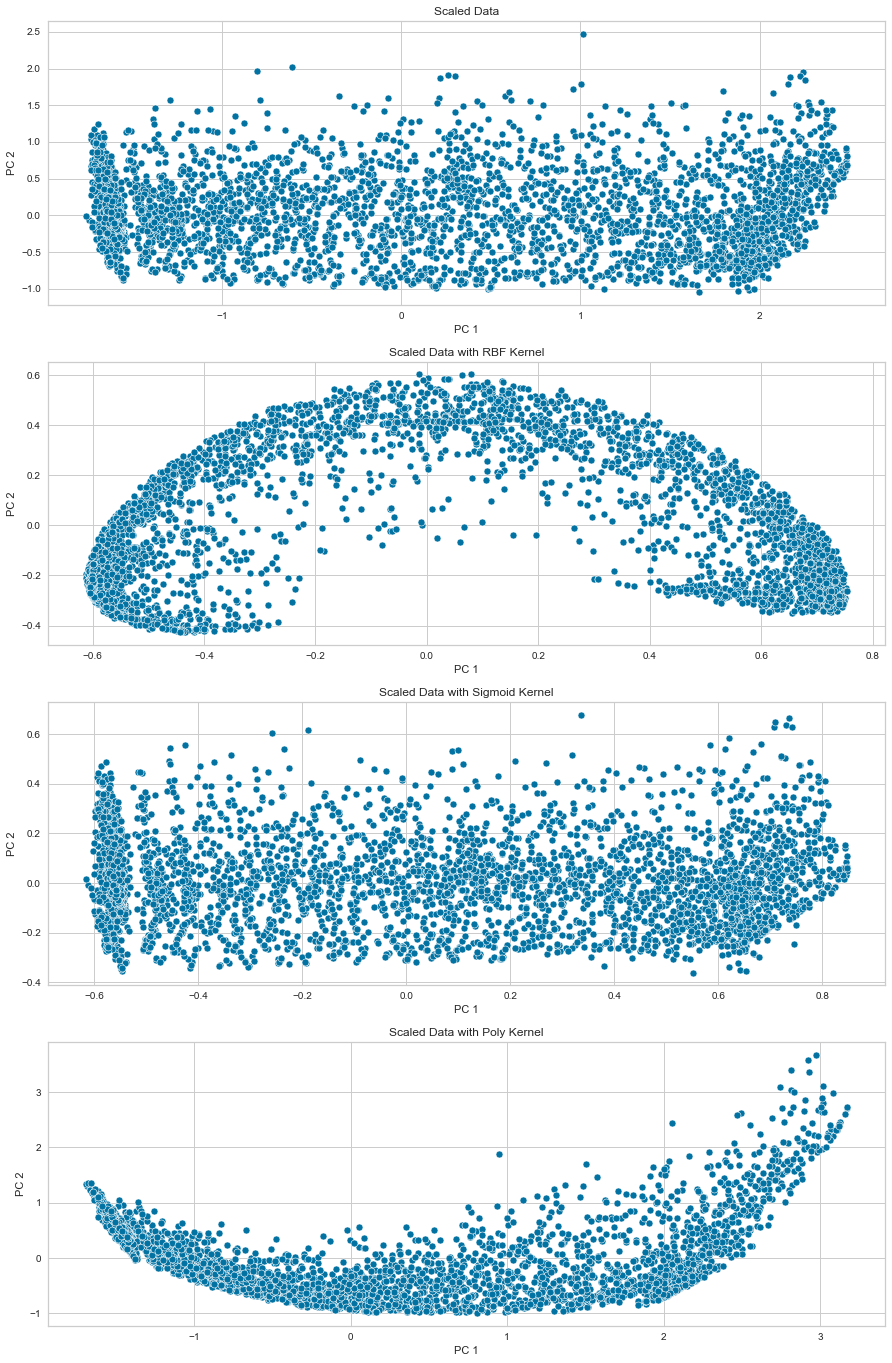

In [63]:
# Visualisasi X_reduced (yang sudah diPCA) ke dalam PCA2dimensi dan kernelPCA2dimensi untuk melihat tipikal sebaran data dalam 2 dimensi

pca_2d = PCA(n_components=2).fit(X_reduced)
kpca_2d_rbf = KernelPCA(n_components=2, kernel='rbf').fit(X_reduced)
kpca_2d_sig = KernelPCA(n_components=2, kernel='sigmoid').fit(X_reduced)
kpca_2d_ply = KernelPCA(n_components=2, kernel='poly').fit(X_reduced)

X2d = pca_2d.transform(X_reduced)
X2d_rbf =kpca_2d_rbf.transform(X_reduced)
X2d_sig =kpca_2d_sig.transform(X_reduced)
X2d_ply =kpca_2d_ply.transform(X_reduced)


fig,ax=plt.subplots(nrows=4,figsize=(15,24))
sns.scatterplot(x=X2d[:,0], y=X2d[:,1], ax=ax[0])
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[0].set_title('Scaled Data')

sns.scatterplot(x=X2d_rbf[:,0], y=X2d_rbf[:,1], ax=ax[1])
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
ax[1].set_title('Scaled Data with RBF Kernel')

sns.scatterplot(x=X2d_sig[:,0], y=X2d_sig[:,1], ax=ax[2])
ax[2].set_xlabel('PC 1')
ax[2].set_ylabel('PC 2')
ax[2].set_title('Scaled Data with Sigmoid Kernel')

sns.scatterplot(x=X2d_ply[:,0], y=X2d_ply[:,1], ax=ax[3])
ax[3].set_xlabel('PC 1')
ax[3].set_ylabel('PC 2')
ax[3].set_title('Scaled Data with Poly Kernel')
plt.show()

Berdasarkan sebaran datanya, dapat dilihat bahwa PCA 2 dimensi dan PCA 2 dimensi dengan kernel rbf/sigmoid/poly menunjukan sebaran data yang berbeda dalam mentransformasi ke dalam bentuk 2 dimensi dari X_reduced.

Untuk evaluasi pengelompokan Clustering pada proses selanjutnya akan menggunakan PCA 2dimensi (default) dan KernelPCA rbf 2 dimensi.

## 6- Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Pada kasus kali ini, dimana *objective* yang diharapakan terjadi ialah suatu clustering *unsupervised learning* untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir, maka pemodelan clustering yang akan dilakukan dengan berbagai algoritma/model sebagai berikut:
1. **K-Means**
2. **Agglomerative Clustering**
3. **Spectral Clustering**
3. **DBScan**

dimana akan menghasilkan suatu *rules* yang nantinya dapat menentukan suatu probabilitas untuk mengelompokan data berdasarkan kemiripan antar datanya kedalam suatu label tertentu.

Adapun setiap model clustering yang dipakai menggunakan parameter defaultnya. Untuk evaluasi metricsnya akan dilihat visualisasi plot ke dalam PCA 2Dimensinya untuk melihat seberapa baik clusteringnya, setidaknya tidak terdapat cluster yang datanya tumpang tindih atau bercampur.

## 7- Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

#### Find n-Cluster based on Elbow Method & Silhoutte Scores

In [64]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=25).fit(X_reduced)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

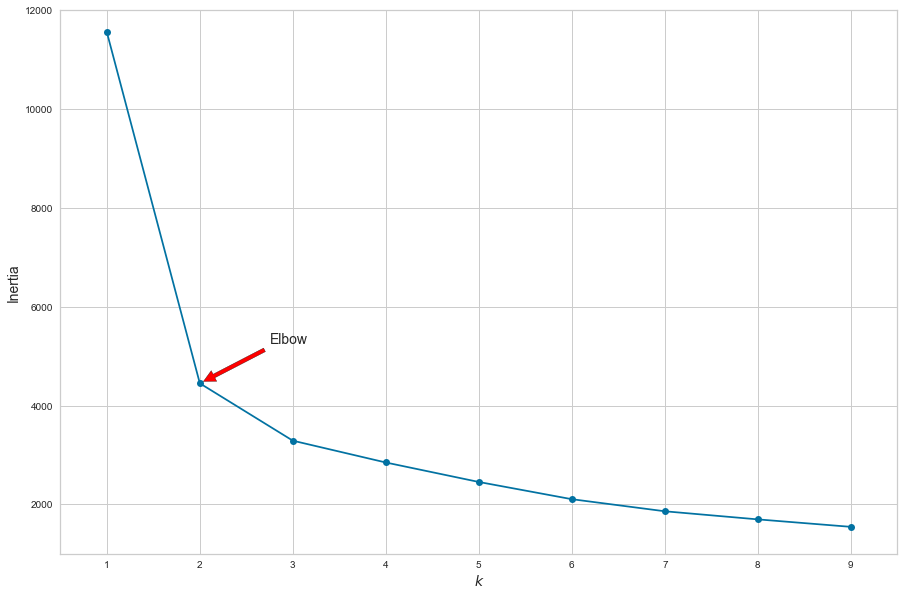

In [65]:
plt.figure(figsize=(15, 10))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.25, 0.35),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='red', shrink=0.05)
            )
plt.axis([0.5, 9.5, 1000, 12000])
plt.show()

In [71]:
inertias[1]

4449.657266139956

Berdasarkan evaluasi menggunakan elbow method, bahwa dapat dilihat terdapat patahan/lekukan pada nilai KMeans k=2 dengan nilai Inersia = 4449.6. Untuk selanjutnya, akan dilihat nilai Silhoutte Score apabila konsisten menunjukan nilai score yang paling besar pada jumlah kluster k=2, maka nilai k tersebut yang akan dipilih.

In [68]:
silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

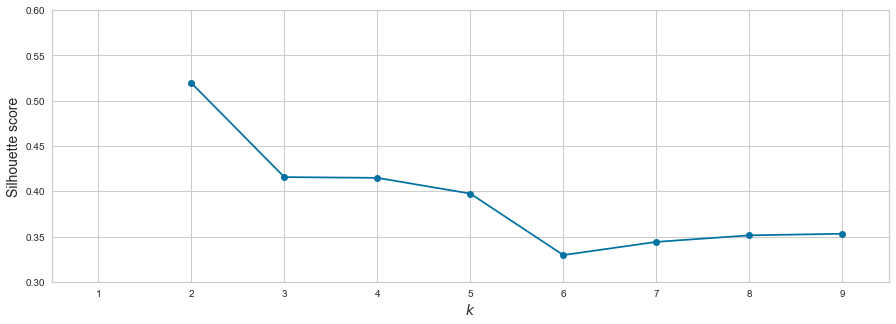

In [69]:
plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0.5, 9.5, 0.3, 0.6])
plt.show()

In [70]:
silhouette_score(X_reduced, kmeans_per_k[1].labels_)

0.5194439286160671

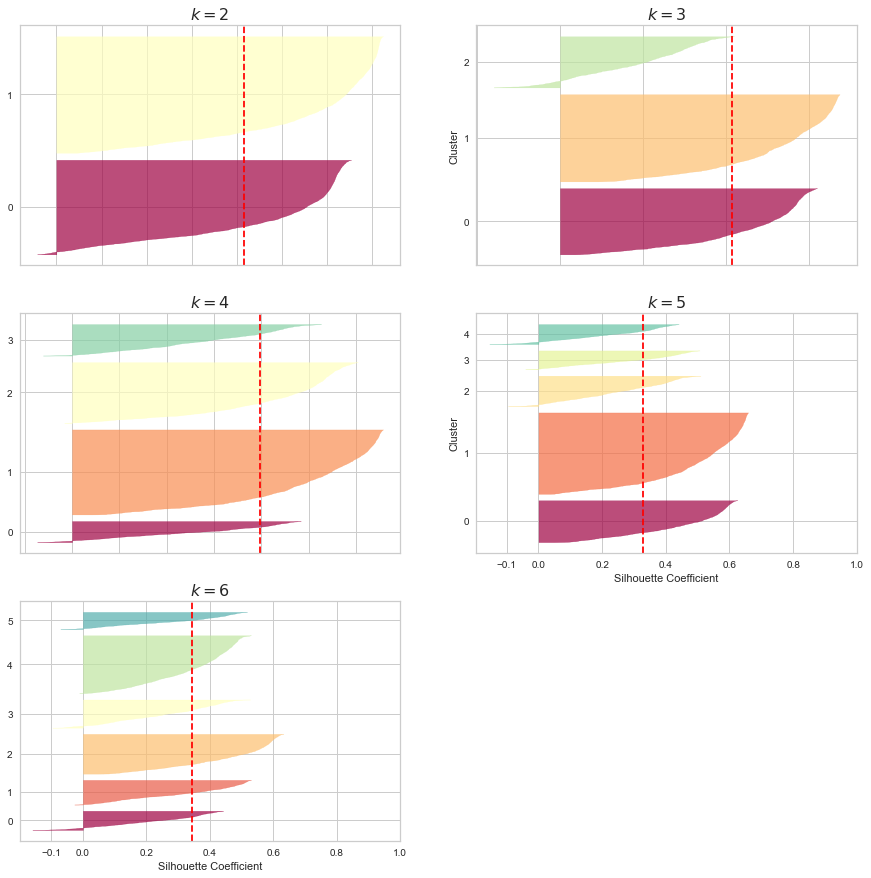

In [256]:
plt.figure(figsize=(15, 15))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_reduced, y_pred)

    padding = len(X_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Berdasarkan evaluasi menggunakan Silhoutte Score dan viluasiasi perpotongan garis merah pada klustering sesuai dengan koefisien silhoutte-nya, bahwa dapat dilihat nilai silhoutte score paling tinggi terjadi pada k=2 dengan skor 0.52 dan evaluasi visualisasinya pun memotong garis batas merah sebagaimana ditunjukan pada visualisasi di atas.

Maka, untuk proses selanjutnya jumlah kluster yang dipilih ialah n_clusters = 2.

### Baseline Model Training

#### K-Means

In [93]:
kmeans = KMeans(n_clusters=2, random_state=25).fit(X_reduced)

#### Spectral Clustering

In [94]:
sc = SC(n_clusters=2, random_state=25).fit(X_reduced)

#### Agglomerative Clustering

In [95]:
agglo = AC(n_clusters=2).fit(X_reduced)

#### DBSCAN

In [96]:
dbscan = DBSCAN().fit(X_reduced)

## 8- Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

#### PCA2D (default)

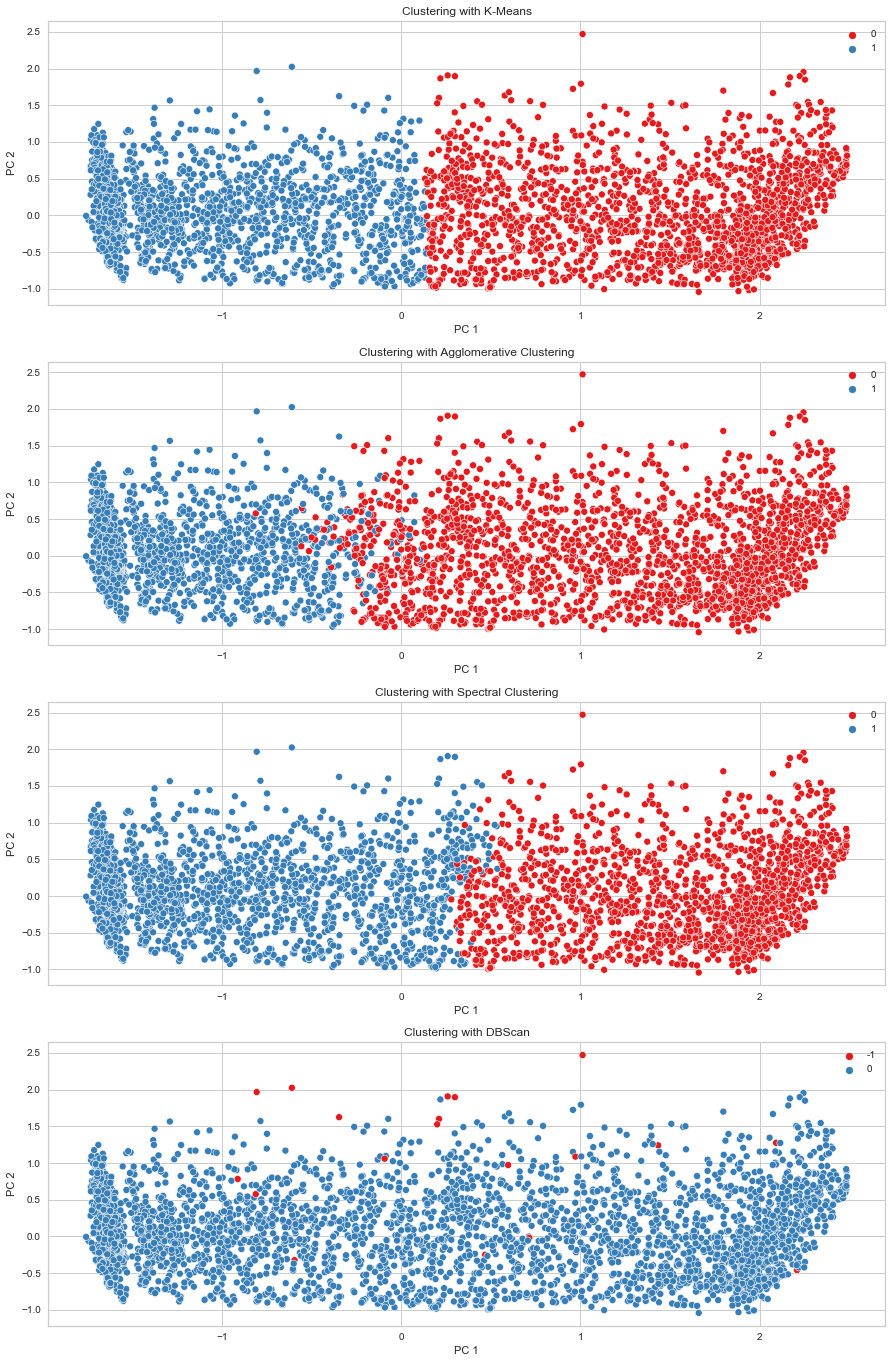

In [102]:
fig,ax=plt.subplots(nrows=4,figsize=(15,24))
sns.scatterplot(x=X2d[:,0], y=X2d[:,1], hue=kmeans.labels_, palette='Set1', ax=ax[0])
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[0].set_title('Clustering with K-Means')

sns.scatterplot(x=X2d[:,0], y=X2d[:,1], hue=agglo.labels_, palette='Set1', ax=ax[1])
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
ax[1].set_title('Clustering with Agglomerative Clustering')

sns.scatterplot(x=X2d[:,0], y=X2d[:,1], hue=sc.labels_, palette='Set1', ax=ax[2])
ax[2].set_xlabel('PC 1')
ax[2].set_ylabel('PC 2')
ax[2].set_title('Clustering with Spectral Clustering')

sns.scatterplot(x=X2d[:,0], y=X2d[:,1], hue=dbscan.labels_, palette='Set1', ax=ax[3])
ax[3].set_xlabel('PC 1')
ax[3].set_ylabel('PC 2')
ax[3].set_title('Clustering with DBScan')
plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa clustering dengan menggunakan K-Means default menunjukan hasil yang baik, karena mampu memisahkan kelompok label 0 dan 1 dengan sempurna, dimana tidak terdapat tumpang tindih dan data label 0 dan 1 tidak bercampur di area likelihood.

Sementara, clustering dengan menggunakan Agglomerative Clustering dan Spectral Clustering default menunjukan hasil kluster yang tidak cukup baik dalam memisahkan label 0 dan 1, karena masih ditemukan label 0 berada di sebaran label 1 dan sebaliknya.

Lalu, clustering dengan menggunakan DBScan default menunjukan hasil kluster hanya 1 saja, yaitu label 0. Label yang tidak berhasil terjaring dalam radius dan minimum sampel nya ditandai -1, tidak masuk dalam label 0.

#### KernelPCA2D (rbf)

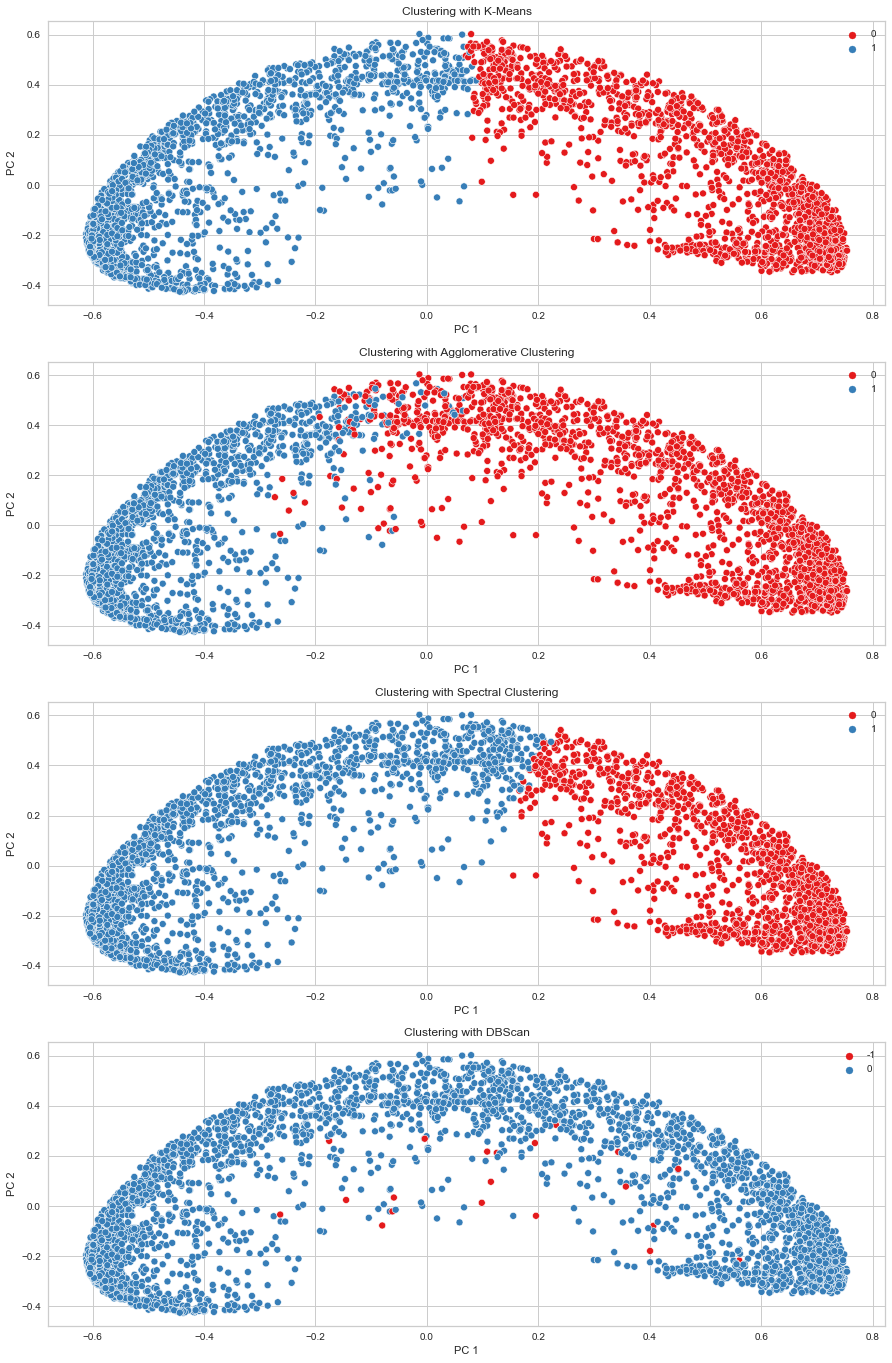

In [104]:
fig,ax=plt.subplots(nrows=4,figsize=(15,24))
sns.scatterplot(x=X2d_rbf[:,0], y=X2d_rbf[:,1], hue=kmeans.labels_, palette='Set1', ax=ax[0])
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[0].set_title('Clustering with K-Means')

sns.scatterplot(x=X2d_rbf[:,0], y=X2d_rbf[:,1], hue=agglo.labels_, palette='Set1', ax=ax[1])
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
ax[1].set_title('Clustering with Agglomerative Clustering')

sns.scatterplot(x=X2d_rbf[:,0], y=X2d_rbf[:,1], hue=sc.labels_, palette='Set1', ax=ax[2])
ax[2].set_xlabel('PC 1')
ax[2].set_ylabel('PC 2')
ax[2].set_title('Clustering with Spectral Clustering')

sns.scatterplot(x=X2d_rbf[:,0], y=X2d_rbf[:,1], hue=dbscan.labels_, palette='Set1', ax=ax[3])
ax[3].set_xlabel('PC 1')
ax[3].set_ylabel('PC 2')
ax[3].set_title('Clustering with DBScan')
plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa clustering dengan menggunakan K-Means dan Spectral Clustering menunjukan hasil yang baik, karena mampu memisahkan kelompok label 0 dan 1 dengan sempurna, dimana tidak terdapat tumpang tindih dan data label 0 dan 1 tidak bercampur di area likelihood.

Sementara, clustering dengan menggunakan Agglomerative Clustering menunjukan hasil kluster yang tidak cukup baik dalam memisahkan label 0 dan 1, karena masih ditemukan label 0 berada di sebaran label 1 dan sebaliknya.

Lalu, clustering dengan menggunakan DBScan menunjukan hasil kluster hanya 1 saja, yaitu label 0. Label yang tidak berhasil terjaring dalam radius dan minimum sampel nya ditandai -1, tidak masuk dalam label 0.

Berdasarkan evaluasi clustering pada PCA 2 dimensi (default) dan Kernel PCA 2 dimensi (rbf), maka dapat disimpulkan dan dipilih K-Means sebagai model clustering paling optimal dan konsisten dalam melakukan *clustering* karena mampu mengelompokan data dengan kemiripan tertentu dengan baik, dibandingkan metode lainnya.

#### Save clustering result

In [105]:
clust_res = kmeans.labels_

In [106]:
clust_res.shape

(4302,)

In [107]:
clust_res_df = pd.DataFrame(clust_res, columns=['labels'])
clust_res_df.shape

(4302, 1)

In [108]:
X.reset_index(drop=True, inplace=True)

In [109]:
X['LABELS'] = clust_res_df

In [110]:
X

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      943.584041           0.875000     103.00            103.00   
1      461.455720           1.000000     585.00            585.00   
2     1053.594730           1.000000    1450.00           1450.00   
3     2237.238086           1.000000     120.00            120.00   
4      424.994385           0.375000    1200.00           1200.00   
...           ...                ...        ...               ...   
4297  1079.008102           1.000000       0.00              0.00   
4298   809.582978           0.909091       0.00              0.00   
4299  3386.490883           1.000000     560.98            427.22   
4300  4840.545574           1.000000    1595.93           1595.93   
4301  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4297                    0.00   1259.571764             0.000000   
4298                    0.00   3819.672466             0.000000   
4299                  133.76   2008.153534             1.000000   
4300                    0.00   4359.325750             0.454545   
4301                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                          0.000000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4297                    0.000000                          0.000000   
4298                    0.000000                          0.000000   
4299                    0.727273                          0.363636   
4300                    0.454545                          0.000000   
4301                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1        1000.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        2500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4297                0.545455                 9              0        1200.0   
4298                0.545455                 7              0        4150.0   
4299                0.545455                 9             20       10100.0   
4300                0.545455                17             25        6000.0   
4301                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  LABELS  
0      215.325023        410.484825          0.000000       8       1  
1      258.032630        151.696433          0.000000       8       1  
2      397.090516        227.143184          0.000000       8       1  
3      343.102984        712.986387          0.000000       8       1  
4       57.266292         56.720210          0.000000       8       1  
...           ...               ...               ...     ...     ...  
4297  1379.635287        271.364415          0.090909      11       1  
4298  4372

### Exolatory Data Analysis after Clustering

<AxesSubplot:xlabel='LABELS', ylabel='count'>

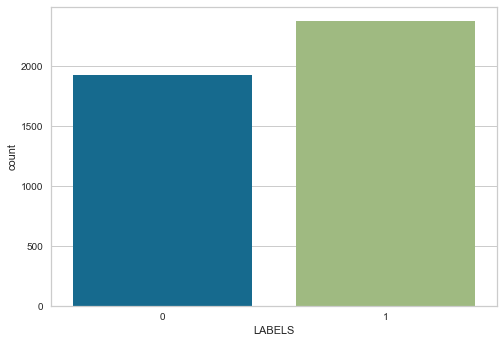

In [117]:
sns.countplot(x=X['LABELS'])

In [130]:
X.LABELS.value_counts()

1    2374
0    1928
Name: LABELS, dtype: int64

Berdasarkan sajian di atas, dapat dilihat bahwa label 1 lebih banyak dariapda label 0.

<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

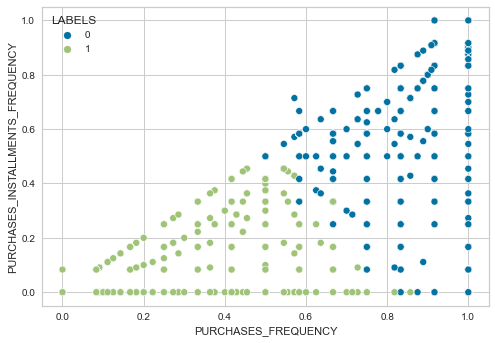

In [119]:
# Melakukan visualisasi hubungan frekuensi pembelian dengan dicicil terhadap frekuensi keseluruhan pembelian dengan labels

sns.scatterplot(x=X['PURCHASES_FREQUENCY'], y=X['PURCHASES_INSTALLMENTS_FREQUENCY'], hue=X['LABELS'])

<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='ONEOFF_PURCHASES_FREQUENCY'>

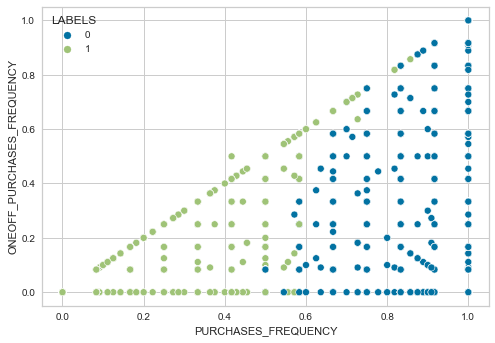

In [120]:
# Melakukan visualisasi hubungan frekuensi pembelian tanpa dicicil terhadap frekuensi keseluruhan pembelian dengan labels

sns.scatterplot(x=X['PURCHASES_FREQUENCY'], y=X['ONEOFF_PURCHASES_FREQUENCY'], hue=X['LABELS'])

Berdasarkan sajian di atas, dapat dilihat bahwa labels=1 frekuensi pembelian baik secara dicicil ataupun tidak sangat jarang dilakukan, sementara pada labels=0 frekuensinya lebih tinggi (sekitar >0.6)

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='CASH_ADVANCE'>

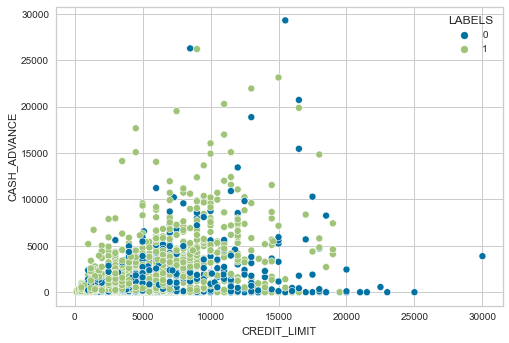

In [118]:
# Melakukan visualisasi hubungan pengambilan tarik tunai terhadap limit CC dengan labels

sns.scatterplot(x=X['CREDIT_LIMIT'], y=X['CASH_ADVANCE'], hue=X['LABELS'])

Berdasarkan sajian di atas, dapat dilihat bahwa labels=1 pada rentang `CREDIT_LIMIT` kurang dari 15,000 labels=1 melakukan penarikan tunai `CASH_ADVANCE` lebih banyak yaitu pada rentang 0-22,500, lebih tinggi dan lebih mendominasi daripada labels=0. 

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='PURCHASES'>

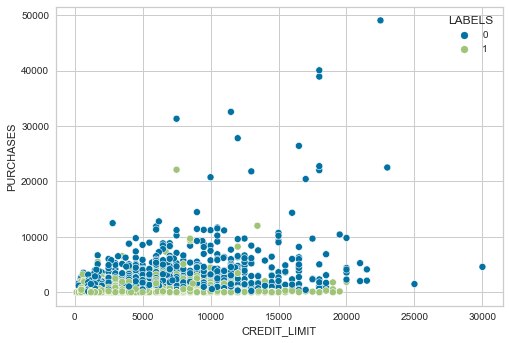

In [121]:
# Melakukan visualisasi hubungan pengunaan untuk belanja terhadap limit CC dengan lebels

sns.scatterplot(x=X['CREDIT_LIMIT'], y=X['PURCHASES'], hue=X['LABELS'])

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

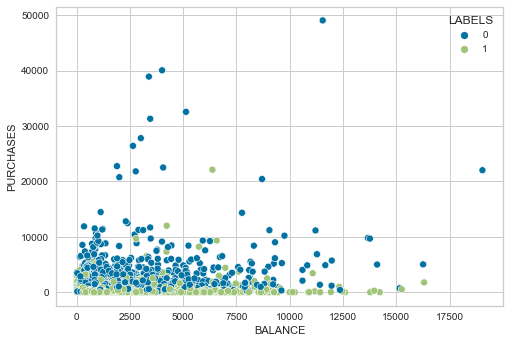

In [122]:
# Melakukan visualisasi hubungan pengunaan untuk belanja terhadap sisa balance di CC dengan labels

sns.scatterplot(x=X['BALANCE'], y=X['PURCHASES'], hue=X['LABELS'])

Berdasarkan sajian di atas, dapat dilihat bahwa labels=1 pada rentang nilai `CREDIT_LIMIT` dan `BALANCE` berada pada nilai yang rendah (kurang dari 5,000) dalam hal melakukan pembelanjaan `PURCHASES` menggunakan CC. Sementara, labels=0 terlihat sangat aktif (dalam jumlah yang besar dan bervariasi dari 0-40,000) dalam melakukan pembelanjaan `PURCHASES`.

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='PAYMENTS'>

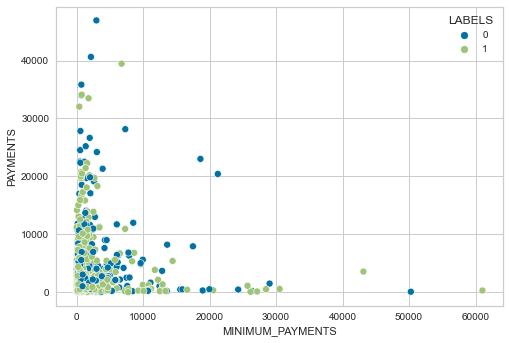

In [125]:
# Melakukan visualisasi hubungan pembayaran tagihan terhadap minimum pembayaran tagihannya dengan labels

sns.scatterplot(x=X['MINIMUM_PAYMENTS'], y=X['PAYMENTS'], hue=X['LABELS'])

Berdasarkan sajian di atas, dapat dilihat bahwa labels=1 dan labels=0 berada pada rentang kepadatan yang sama pada hubungan `PAYMENTS` dan `MINIMUM_PAYMENTS`. 

In [127]:
X.groupby(by=['LABELS'])[['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].mean().sort_values(by='LABELS',ascending=False)

PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT
LABELS                                                 
1       1554.811803        852.236975          0.092979
0       2076.700135        857.893674          0.250167

Berdasarkan query & agregasi di atas, dapat dilihat bahwa labels=1 nilai rata-rata pembayaran tagihan `PAYMENTS` lebih sedikit daripada rata-rata labels=0. Sementara, labels=1 nilai rata-rata rasio pembayaran tagihan lunas `PRC_FULL_PAYMENT` lebih rendah yaitu 0.09.

In [126]:
X.groupby(by=['LABELS'])[['CREDIT_LIMIT', 'BALANCE', 'PURCHASES', 'CASH_ADVANCE']].mean().sort_values(by='LABELS',ascending=False)

CREDIT_LIMIT      BALANCE    PURCHASES  CASH_ADVANCE
LABELS                                                      
1        4142.431901  1747.228638   356.456601   1363.033781
0        5003.274341  1422.405661  1850.314855    526.746153

Berdasarkan query & agregasi di atas, dapat dilihat bahwa labels=1 nilai rata-rata pembelanjaannya `PURCHASE` lebih sedikit yaitu 356,45 (1/6 x dari rata-rata labels=0). Sementara, labels=1 nilai rata-rata penarikan tunai `CASH_ADVANCE` lebih banyak yaitu 1363,03 (~3 x dari rata-rata labels=0).

In [133]:
X.groupby(by=['LABELS'])[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].mean().sort_values(by='LABELS',ascending=False)

PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
LABELS                                                       
1        356.456601        299.267645               57.417401
0       1850.314855        971.758117              879.137951

Berdasarkan query & agregasi di atas, dapat dilihat bahwa labels=1 nilai rata-rata pembelanjaannya `PURCHASE`, baik yang tanpa dicicil `ONEOFF_PURCHASES` maupun yang dengan cicilan `INSTALLMENTS_PURCHASES` lebih sedikit daripada rata-rata labels=0.

In [132]:
X.groupby(by=['LABELS'])[['PURCHASES_TRX', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY']].mean().sort_values(by='LABELS',ascending=False)

PURCHASES_TRX  PURCHASES_FREQUENCY  CASH_ADVANCE_TRX  \
LABELS                                                         
1            3.493682             0.174625          4.398062   
0           28.771784             0.891778          1.852697   

        CASH_ADVANCE_FREQUENCY  
LABELS                          
1                     0.186686  
0                     0.074308

Berdasarkan query & agregasi di atas, dapat dilihat bahwa labels=1 nilai rata-rata aktivitas transaksi dan frekuensi pembelanjaan `PURCHASES_TRX` dan `PURCHASES_FREQUENCY` lebih sedikit daripada rata-rata labels=0). 

Sementara, labels=1 nilai rata-rata aktivitas transaksi dan frekuensi kegiatan tarik tunai `CASH_ADVANCE_TRX` dan `CASH_ADVANCE_FREQUENCY` lebih sedikit daripada rata-rata labels=0)

### Customer Segmentation Results

Berdasarkan analisis Exploratory Data Analysis sebelumnya pada *features* yang telah dilakukan analisis berdasarkan labels hasil clusteringnya maka dapat disimpulkan sebagai berikut:
 - Labels = 1, merupakan customer dari Credit Card yang aktif menggunakan Credit Card untuk keperluan penarikan tunai.
 - Labels = 0, merupakan customer dari Credit Card yang aktif menggunakan Credit Card untuk keperluan pembelanjaan sesesuatu.

## 9- Model Saving

In [135]:
# Menyimpan pemodelan pickle dan list untuk model inference 

import joblib
import json

with open('pca.pkl', 'wb') as file_1:
  joblib.dump(pca, file_1)

with open('kmeans.pkl', 'wb') as file_2:
  joblib.dump(kmeans, file_2)

with open('normscaler.pkl', 'wb') as file_3:
  joblib.dump(normscaler, file_3)

with open('skewscaler.pkl', 'wb') as file_4:
  joblib.dump(skewscaler, file_4)

with open('norm_columns.txt', 'w') as file_5:
  json.dump(norm_columns, file_5)

with open('skew_columns.txt', 'w') as file_6:
  json.dump(skew_columns, file_6)

## 10- Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

### Model Loading

In [136]:
# Memuat ulang pemodelan pickle dan list untuk model inference 

with open('pca.pkl', 'rb') as file_1:
  pca = joblib.load(file_1)

with open('kmeans.pkl', 'rb') as file_2:
  kmeans = joblib.load(file_2)

with open('normscaler.pkl', 'rb') as file_3:
  normscaler = joblib.load(file_3)

with open('skewscaler.pkl', 'rb') as file_4:
  skewscaler = joblib.load(file_4)

with open('norm_columns.txt', 'r') as file_5:
  norm_columns = json.load(file_5)

with open('skew_columns.txt', 'r') as file_6:
  skew_columns = json.load(file_6)

In [137]:
# Menampilkan Inference Set

data_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        98  2196.006333           1.000000     666.89            550.79   
1      6846   328.686581           1.000000    2806.78           2588.53   
2      8718  1258.769693           1.000000     142.00             42.00   
3      5508  2173.621597           1.000000     200.00            200.00   
4      1582    45.785125           0.636364      12.00              0.00   
5      5856   711.922203           0.818182     197.21            197.21   
6      8512   289.220297           1.000000       0.00              0.00   
7      2250   342.761070           1.000000      20.00             20.00   
8      3376  4484.839808           1.000000     591.30              0.00   
9      6144  1265.805627           0.818182       0.00              0.00   
10     5646  1175.241984           1.000000    1102.72           1102.72   
11     2576   606.246031           0.909091    3876.00           2380.00   
12     3200   266.475852           0.272727       0.00              0.00   
13     4320   629.946336           1.000000    1832.92           1832.92   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   116.10      0.000000             0.500000   
1                   218.25      0.000000             0.857143   
2                   100.00      0.000000             0.166667   
3                     0.00    201.404735             0.083333   
4                    12.00    166.160258             1.000000   
5                     0.00      0.000000             0.083333   
6                     0.00   1048.868332             0.000000   
7                     0.00    148.074839             0.083333   
8                   591.30   1402.722044             0.750000   
9                     0.00   2820.528417             0.000000   
10                    0.00    136.401822             0.571429   
11                 1496.00    914.843621             0.833333   
12                    0.00   1560.735908             0.000000   
13                    0.00      0.000000             0.500000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.250000                          0.166667   
1                     0.714286                          0.285714   
2                     0.083333                          0.083333   
3                     0.083333                          0.000000   
4                     0.000000                          0.916667   
5                     0.083333                          0.000000   
6                     0.000000                          0.000000   
7                     0.083333                          0.000000   
8                     0.000000                          0.750000   
9                     0.000000                          0.000000   
10                    0.571429                          0.000000   
11                    0.166667                          0.750000   
12                    0.000000                          0.000000   
13                    0.500000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.000000                 0              8        7500.0   
1                 0.000000                 0             26        1200.0   
2                 0.000000                 0              2        1200.0   
3                 0.250000                 4              1        8000.0   
4                 0.083333                 3             12        1200.0   
5                 0.000000                 0              1        1500.0   
6                 0.083333                 3              0        1200.0   
7                 0.250000                 3              1         500.0   
8                 0.083333                 1             23        6500.0   
9                 0.250000                 3              0        2500.0   
10                0

In [138]:
# Memisahkan data_inf berdasarkan jenis datanya untuk keperluan normalisasi dan encoding

data_inf_norm = data_inf[norm_columns]
data_inf_skew = data_inf[skew_columns]

In [140]:
# Melakukan normalisasi (feature scaling) data_inf_norm & data_inf_skew

data_inf_norm_scaled = normscaler.transform(data_inf_norm)
data_inf_skew_scaled = skewscaler.transform(data_inf_skew)

In [141]:
# Menggabungkan kembali hasil normalisasi dan encoding ke dalam satu arrays

data_inf_final = np.concatenate([data_inf_norm_scaled, data_inf_skew_scaled], axis=1)

In [142]:
# Mengubah data_inf_final ke dalam dataframe

data_inf_final_df = pd.DataFrame(data_inf_final, columns=[norm_columns+skew_columns])
data_inf_final_df

PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY   BALANCE  \
0             0.009944                        -0.511325  0.274728   
1             0.903678                        -0.212429  0.041120   
2            -0.824207                        -0.720555  0.157477   
3            -1.032747                        -0.929782  0.271928   
4             1.261171                         1.371728  0.005728   
5            -1.032747                        -0.929782  0.089064   
6            -1.241284                        -0.929782  0.036182   
7            -1.032747                        -0.929782  0.042881   
8             0.635558                         0.953271  0.561069   
9            -1.241284                        -0.929782  0.158357   
10            0.188692                        -0.929782  0.147027   
11            0.844095                         0.953271  0.075844   
12           -1.241284                        -0.929782  0.033337   
13            0.009944                        -0.929782  0.078809   

   BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES INSTALLMENTS_PURCHASES  \
0       1.000000e+00  0.149362         0.229496               0.058167   
1       1.000000e+00  0.628629         1.078554               0.109346   
2       1.000000e+00  0.031803         0.017500               0.050101   
3       1.000000e+00  0.044794         0.083333               0.000000   
4       2.220446e-16  0.002688         0.000000               0.006012   
5       5.000000e-01  0.044169         0.082171               0.000000   
6       1.000000e+00  0.000000         0.000000               0.000000   
7       1.000000e+00  0.004479         0.008333               0.000000   
8       1.000000e+00  0.132432         0.000000               0.296248   
9       5.000000e-01  0.000000         0.000000               0.000000   
10      1.000000e+00  0.246974         0.459467               0.000000   
11      7.500000e-01  0.868101         0.991667               0.749514   
12     -1.000003e+00  0.000000         0.000000               0.000000   
13      1.000000e+00  0.410516         0.763717               0.000000   

   CASH_ADVANCE ONEOFF_PURCHASES_FREQUENCY CASH_ADVANCE_FREQUENCY  \
0      0.000000                   0.250000               0.000000   
1      0.000000                   0.714286               0.000000   
2      0.000000                   0.083333               0.000000   
3      0.045336                   0.083333               0.250000   
4      0.037403                   0.000000               0.083333   
5      0.000000                   0.083333               0.000000   
6      0.236099                   0.000000               0.083333   
7      0.033332                   0.083333               0.250000   
8      0.315752                   0.000000               0.083333   
9      0.634899                   0.000000               0.250000   
10     0.030704                   0.571429               0.285714   
11     0.205931                   0.166667               0.083333   
12     0.351320                   0.000000               0.166667   
13     0.000000                   0.500000               0.000000   

   CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  PAYMENTS MINIMUM_PAYMENTS  \
0            0.0000      0.123077     0.344262  0.087667         0.273960   
1            0.0000      0.400000     0.049180  0.273501         0.032948   
2            0.0000      0.030769     0.049180  0.045150         2.381500   
3            0.2500      0.015385     0.367681  0.074955         0.178144   
4            0.1875      0.184615     0.049180  0.005298         0.016482   
5            0.0000      0.015385     0.063232  0.271148         0.099463   
6            0.1875      0.000000     0.049180  0.008289         0.102132   
7            0.1875      0.015385     0.016393  0.076770         0.070235   
8            0.0625      0.353846     0.297424  0.224639         0.437026   
9            0.1875      0.000000     0.110070  0.

### Inferencing

In [148]:
# Melakukan reduksi dimensionality dan clustering menggunakan model K-Means

data_inf_pca = pca.transform(data_inf_final_df)
labels_inf_pca = kmeans.predict(data_inf_pca)
labels_inf_pca

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [149]:
# Menyimpan dalam bentuk dataframe hasil klasifikasi menggunakan model Random Forest Classifier & XG Boosting Classifierdengan Hyperparameters

labels_inf = pd.DataFrame(labels_inf_pca, columns=['labels'])

In [150]:
# Menyatukan dataframe hasil klasifikasi menggunakan model Random Forest Classifier & XG Boosting Classifier dengan Hyperparameters ke dalam data_inf

data_inf_show  = pd.concat([data_inf, labels_inf], axis=1)
data_inf_show

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        98  2196.006333           1.000000     666.89            550.79   
1      6846   328.686581           1.000000    2806.78           2588.53   
2      8718  1258.769693           1.000000     142.00             42.00   
3      5508  2173.621597           1.000000     200.00            200.00   
4      1582    45.785125           0.636364      12.00              0.00   
5      5856   711.922203           0.818182     197.21            197.21   
6      8512   289.220297           1.000000       0.00              0.00   
7      2250   342.761070           1.000000      20.00             20.00   
8      3376  4484.839808           1.000000     591.30              0.00   
9      6144  1265.805627           0.818182       0.00              0.00   
10     5646  1175.241984           1.000000    1102.72           1102.72   
11     2576   606.246031           0.909091    3876.00           2380.00   
12     3200   266.475852           0.272727       0.00              0.00   
13     4320   629.946336           1.000000    1832.92           1832.92   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   116.10      0.000000             0.500000   
1                   218.25      0.000000             0.857143   
2                   100.00      0.000000             0.166667   
3                     0.00    201.404735             0.083333   
4                    12.00    166.160258             1.000000   
5                     0.00      0.000000             0.083333   
6                     0.00   1048.868332             0.000000   
7                     0.00    148.074839             0.083333   
8                   591.30   1402.722044             0.750000   
9                     0.00   2820.528417             0.000000   
10                    0.00    136.401822             0.571429   
11                 1496.00    914.843621             0.833333   
12                    0.00   1560.735908             0.000000   
13                    0.00      0.000000             0.500000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.250000                          0.166667   
1                     0.714286                          0.285714   
2                     0.083333                          0.083333   
3                     0.083333                          0.000000   
4                     0.000000                          0.916667   
5                     0.083333                          0.000000   
6                     0.000000                          0.000000   
7                     0.083333                          0.000000   
8                     0.000000                          0.750000   
9                     0.000000                          0.000000   
10                    0.571429                          0.000000   
11                    0.166667                          0.750000   
12                    0.000000                          0.000000   
13                    0.500000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.000000                 0              8        7500.0   
1                 0.000000                 0             26        1200.0   
2                 0.000000                 0              2        1200.0   
3                 0.250000                 4              1        8000.0   
4                 0.083333                 3             12        1200.0   
5                 0.000000                 0              1        1500.0   
6                 0.083333                 3              0        1200.0   
7                 0.250000                 3              1         500.0   
8                 0.083333                 1             23        6500.0   
9                 0.250000                 3              0        2500.0   
10                0

## 11- Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

### Jawaban Conceptual Problem 1) Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Inertia pada K-Means adalah mengukur seberapa baik sebuah dataset pada sampel dikelompokan/diklusterkan dengan K-Means, dimana inertia menghitung jumlah dari jarak kuadrat antar data poin terhadap centroid kluster itu. Pada algoritma ini bertujuan untuk memilih centroid yang memengecilkan nilai inersianya, sekaligus digunakan untuk mengukur seberapa koheren cluster yang terbentuk.

### Jawaban Conceptual Problem 2)  Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow method adalah suatu metode evaluasi yang digunakan untuk memilih banyaknya jumlah clustering (k) yang paling optimal berdasarkan nilai inersianya untuk melakukan clustering pada datasetnya. 

Adapun cara penggunaan elbow method ialah dengan melakukan iterasi n-jumlah clusterng (k) terhadap nilai inersia dari penjumlahan jarak kuadrat antar data poin terhadap centroid kluster pada setiap iterasi perubahan K. Nantinya akan dipilih banyaknya jumlah clustering paling optimal pada terjadi tekukakn/lekukan pada plot inersia terhadap jumlah clusteringnya, dimana perubahan nilai inersianya cenderung berkurang secara tidak signifikan pada setiap perubahan K nya.

Adapun kelemahan pada metode elbow method ialah metode ini hanya menghitung jarak secara euclideannya antar data point-nya saja, sementara metode evaluasi lainnya yaitu 'Silhoutte Score' sebagai metode evaluasi pendamping dalam memilih K paling optimal dengan melihat/memperhitungkan juga variansi (variance), nilai ketidaksimetrisan sebaran (skewness value), dan besar kecilnya perbedaan data. Selain itu, elbow method akan sulit dijustifikasi saat plot inersia dari variasi K tidak terlalu membentuk lekukan yang jelas signifikansi perubahannya.

### Jawaban Conceptual Problem 3) Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

- K-Means:
    - Cocok digunakan:
        - pada sebaran data berbentuk lingkaran / *sphere*
    - Kelebihan: 
        - algoritma paling cepat yang bekerja berdasarkan penentuan centroidnya
        - dapat bekerja pada dataset yang berjumlah sangat banyak
        - mampu mengurangi variansi di dalam clustering
    - Kelemahan:
        - terdampak apabila terdapat *noise*/data yang menyimpang
        - outliers tidak dapat diidentifikasi
        - tidak cocok untuk dataset yang tidak berbentuk spherical-like.
- Agglomerative Clustering:
    - Cocok digunakan:
        - terdapat keterbatasan hubungan
        - untuk metode non euclidean distance
    - Kelebihan:
        - lebih fleksibel terhadap tingkatan sebaran yang memiliki detail kecil banyak
        - dapat mengatasi berbagai bentuk kemiripan ataupun jarak
    - Kekurangan:
        - secara komputasi lebih sulit dan mahal
        - outliers tidak dapat diidentifikasi
        - pada parameter linkage Ward cenderung menghasilkan cluster yang sama besar
- Spectral Clustering:
    - Cocok digunakan:
        - pada sebaran data yang bergeometri tidak sama besar, berbentuk kelengkungan tertentu (tidak berbentuk sphere)
    - Kelebihan:
        - menggunakan eigenvector untuk melakukan clustering
        - dapat mengatasi clustering berbagai bentuk dan ukuran kemiripan sebaran data
    - Kekurangan:
        - secara komputasi lebih sulit dan mahal
        - sangat bergantung pada grafik dan jalur keterhubungan data yang berdekatan

- DBScan:
    - Cocok digunakan:
        - pada sebaran data yang bergeometri tidak sama besar, berbentuk kelengkungan tertentu (tidak berbentuk sphere)
    - Kelebihan:
        - mampu mendeteksi outliers
        - dapat mengatasi clustering berbagai bentuk dan ukuran kemiripan sebaran data
        - tidak memerlukan kriteria jumlah cluster di awalnya
    - Kelemahan:
        - sangat sensitif terhadap parameter panjang eps dan jumlah min sampel poin
        - tidak dapat melakukan clustering pada dataset yang variansinya tinggi tetapi pada densitas yang sama

### Kesimpulan

Terdapat missing values berdasarkan keterangan non-null pada kolom `CREDIT_LIMIT` sebanyak 1 baris informasi nilai dan kolom `MINIMUM_PAYMENTS` sebanyak 158 baris informasi nilai.

Adapun hasil EDA pada dataset yang diberikan diperoleh informasi sebagai berikut:
-  terdapat 4 nasabah yang frekuensi pembelian yang dilakukan secara dicicil `PURCHASES_INSTALLMENTS_FREQUENCY` menggunakan CC melebihi frekuensi pembelian `PURCHASES_FREQUENCY` dan terdapat 1 nasabah yang frekuensi pembelian dilakukan langsung tanpa dicicil `ONEOFF_PURCHASES_FREQUENCY` lmenggunakan CC melebih frekuensi pembeliannya. 5 data nasabah tersebut patut diduga terjadi error dalam rekap atau indikasi lain yaitu bug pada sistem karena rasio frekuensinya melebih 1 (tidak mungkin seharusnya terjadi).
- terdapat 7 nasabah yang menggunakan CC melebihi batas limitnya, hal ini ditunjukan pada nasabah yang `CREDIT_LIMIT` nya kurang dari 20,000 tetapi menggunakannya untuk tarik tunai ditunjukan pada `CASH_ADVANCE` yang melebih nilai limit 20,000 dengan rentang kelebihan yang bervariasi. Selain itu, dari 7 nasabah tersebut terdapat 1 nasabah yang menggunakan CC nya melebihi kewajaran dari *overlimit* nya, yaitu dengan limit sekitar 15,000 menggunakan untuk tarik tunai sekitar 30,000 (hampir 2x lipat limitnya) dan terdapat 2 nasabah yang menggunakan CC nya melebihi kewajaran dari *overlimit* nya, yaitu dengan limit sekitar 9,000 menggunakan untuk tarik tunai sekitar 26,000 (hampir 3x lipat limitnya)
- terdapat 12 nasabah yang menggunakan CC melebihi batas limitnya, hal ini ditunjukan pada nasabah yang `CREDIT_LIMIT` nya kurang dari 20,000 tetapi menggunakannya untuk belanja ditunjukan pada `PURCHASES` yang melebih nilai 20,000 dengan rentang kelebihan yang bervariasi yaitu sebanyak 8 nasabah yang kelebihan 0-10,000, sebanyak 4 nasabah yang kelebihan 10,000-20,000 (2x lipat dari limit CC-nya). Selain itu, terdapat 1 nasabah yang patut diduga menggunakan CC nya melebih kewajaran dari *overlimit* nya, yaitu dengan limit sekitar 23,000 menggunakan untuk belanja sebesar 50,000. Secara umum, nasabah menggunakan CC-nya dibawah limitnya. Terdapat 2 nasaah yaitu yang memiliki CC limit 25,000 dan 30,000 terlihat jumlah pembelian `PURCHASES`-nya masih sangat sedikit, dapat dikatakan jarang dipakai atau menggunakan untuk pembelian yang murah (jauh lebih rendah dari limit-nya).
- terdapat 12 nasabah yang menggunakan CC melebihi sisa saldo CCnya sebesar 2x lipatnya, hal ini ditunjukan pada nasabah yang `BALANCE` nya kurang dari 10,000 tetapi menggunakannya untuk belanja ditunjukan pada `PURCHASES` yang melebih nilai 20,000. Selain itu, terdapat 1 nasabah yang menggunakan C melebihi sisa saldo CCnya sebsar 4x lipatnya, hal ini ditunjukan pada nasabah yang `BALANCE` sekitar 11,500 menggunakannya untuk belanja hingga 50,000.
- secara umum pembayaran `PAYMENTS` yang dilakukan oleh nasabah sudah di atas nilai minimum pembayarannya `MINIMUM_PAYMENTS`, hal ini dapat dilihat bahwa minimum pembayaran pada rentang 0- 5000 data berkumpul secara vertikal pada sebaran nilai `PAYMENTS`.Namun, masih dapat dijumpai kelompok nasabah yang `MINIMUM_PAYMENTS` misalnya 50,000 dan 60,000 justru tidak melakukan pembayaran sama sekali.
- rata-rata pembelian yang dilakukan secara dicicil memiliki hubungan berbanding lurus, artinya semakin besar rata-rata cicilannya, semakin panjang `TENURE` cicilannya. Sebagai contoh tenor 12 bulan, rata-rata `INSTALLMENTS_PURCHASES`nya 455,7 sementara tenor yang lebih pendek 6 bulan rata-rata  `INSTALLMENTS_PURCHASES`nya 135,5.

Adapun tahap preprocessing adalah sebagai berikut:
- Memisahkan data inference sebanyak 15 baris dan sisanya sebagai data cluster training
- data cluster training dilakukan handling missing values dengan cara dikeluarkan nilai yang mengandung missing value
- data cluster training dilakukan handling outliers dengan cara menggunakan capping winsoriser() menggunakan IQR untuk data tidak berdistribusi normal
- selanjutnya dilakukan feature scaling menggunakan StandardScaler() untuk data cluster yang berdistribusi normal dan MinMaxScaler() untuk data cluster yang tidak berdistribusi normal
- hasil scaling tersebut selanjutnya dilakukan pemeriksaan nilai VIF (variance inflation factor) untuk melihat seberapa keterkaitan hubungan antar fitur (multicollinerarity), dimana VIF > 5 mengindikasikan keterkaitan antar fitur di dalamnya sangat tinggi. Penentuan VIF ini juga menunjukan seberepa banyak fitur yang cukup mereprsentasikan keterwakilan fitur, dimana diperoleh sebanyak 4 fitur yang VIF < 5.0.
- selanjutnya, dilakukan dimensionality reduction menggunakan PCA dengan menambilan representasi keterwakilan sebesar 85% jumlah kumulatif EVR-nya, dimana diperoleh fitur yang telah direduksi hanya terdiri atas 4 komponen saja.
- selanjutnya, fitur yang sudah dilakuakn PCA akan dilakukan clustering dengan menggunakan K-Means, Agglomerative Clustering, Spectral Clustering, dan DBScan.

Adapun tahap model training dan evaluasi sebagai berikut:
- Pada K-Means ditentukan banyaknya jumlah cluster berdasarkan Elbow Method (nilai inersia tidak berubah signifikan seiring perubahan k) dan Silhoutte Scores (0.52), diperoleh nilai k=2.
- Selanjutnya, dilakukan clustering menggunakan algoritma lain seperti agglomerative clustering, dan spectral clustering dengan menggunakan nilai n_clusters yang sama yaitu 2. Sementara, untuk DBScan dilakukan cluster dengan menentukan nilai eps dan min sampelnya. Adapun keempat model clustering tersebut menggunakan parameter defaultnya.

Adapun clustering evaluasi berdasarkan visualisasi pada PCA 2dimesni-nya sebagai berikut:
- Pada evaluasi PCA2dimensi (default), dilihat bahwa clustering dengan menggunakan K-Means default menunjukan hasil yang baik, karena mampu memisahkan kelompok label 0 dan 1 dengan sempurna, dimana tidak terdapat tumpang tindih dan data label 0 dan 1 tidak bercampur di area likelihood. Sementara, clustering dengan menggunakan Agglomerative Clustering dan Spectral Clustering default menunjukan hasil kluster yang tidak cukup baik dalam memisahkan label 0 dan 1, karena masih ditemukan label 0 berada di sebaran label 1 dan sebaliknya. Lalu, clustering dengan menggunakan DBScan default menunjukan hasil kluster hanya 1 saja, yaitu label 0. Label yang tidak berhasil terjaring dalam radius dan minimum sampel nya ditandai -1, tidak masuk dalam label 0.
- Pada evaluasi kernelPCA2dimensi (rbf), dilihat bahwa clustering dengan menggunakan K-Means dan Spectral Clustering menunjukan hasil yang baik, karena mampu memisahkan kelompok label 0 dan 1 dengan sempurna, dimana tidak terdapat tumpang tindih dan data label 0 dan 1 tidak bercampur di area likelihood. Sementara, clustering dengan menggunakan Agglomerative Clustering menunjukan hasil kluster yang tidak cukup baik dalam memisahkan label 0 dan 1, karena masih ditemukan label 0 berada di sebaran label 1 dan sebaliknya. Lalu, clustering dengan menggunakan DBScan menunjukan hasil kluster hanya 1 saja, yaitu label 0. Label yang tidak berhasil terjaring dalam radius dan minimum sampel nya ditandai -1, tidak masuk dalam label 0.
- Berdasarkan evaluasi clustering pada PCA 2 dimensi (default) dan Kernel PCA 2 dimensi (rbf), maka dapat disimpulkan dan dipilih K-Means sebagai model clustering paling optimal dan konsisten dalam melakukan *clustering* karena mampu mengelompokan data dengan kemiripan tertentu dengan baik, dibandingkan metode lainnya.

Adapun hasil clustering tersebut disimpan hasil clusternya berupa labels=1 dan labels=0 untuk dilakukan EDA-nya sebagai berikut:
- bahwa labels=1 frekuensi pembelian baik secara dicicil ataupun tidak sangat jarang dilakukan, sementara pada labels=0 frekuensinya lebih tinggi (sekitar >0.6)
- bahwa labels=1 pada rentang `CREDIT_LIMIT` kurang dari 15,000 labels=1 melakukan penarikan tunai `CASH_ADVANCE` lebih banyak yaitu pada rentang 0-22,500, lebih tinggi dan lebih mendominasi daripada labels=0. 
- labels=1 pada rentang nilai `CREDIT_LIMIT` dan `BALANCE` berada pada nilai yang rendah (kurang dari 5,000) dalam hal melakukan pembelanjaan `PURCHASES` menggunakan CC. Sementara, labels=0 terlihat sangat aktif (dalam jumlah yang besar dan bervariasi dari 0-40,000) dalam melakukan pembelanjaan `PURCHASES`.
- labels=1 nilai rata-rata pembayaran tagihan `PAYMENTS` lebih sedikit daripada rata-rata labels=0. Sementara, labels=1 nilai rata-rata rasio pembayaran tagihan lunas `PRC_FULL_PAYMENT` lebih rendah yaitu 0.09.
- labels=1 nilai rata-rata pembelanjaannya `PURCHASE` lebih sedikit yaitu 356,45 (1/6 x dari rata-rata labels=0). Sementara, labels=1 nilai rata-rata penarikan tunai `CASH_ADVANCE` lebih banyak yaitu 1363,03 (~3 x dari rata-rata labels=0).
- labels=1 nilai rata-rata pembelanjaannya `PURCHASE`, baik yang tanpa dicicil `ONEOFF_PURCHASES` maupun yang dengan cicilan `INSTALLMENTS_PURCHASES` lebih sedikit daripada rata-rata labels=0.
- labels=1 nilai rata-rata aktivitas transaksi dan frekuensi pembelanjaan `PURCHASES_TRX` dan `PURCHASES_FREQUENCY` lebih sedikit daripada rata-rata labels=0). Sementara, labels=1 nilai rata-rata aktivitas transaksi dan frekuensi kegiatan tarik tunai `CASH_ADVANCE_TRX` dan `CASH_ADVANCE_FREQUENCY` lebih sedikit daripada rata-rata labels=0).

Berdasarkan analisis Exploratory Data Analysis sebelumnya pada *features* yang telah dilakukan analisis berdasarkan labels hasil clusteringnya maka dapat disimpulkan sebagai berikut:
 - Labels = 1, merupakan customer dari Credit Card yang aktif menggunakan Credit Card untuk keperluan penarikan tunai.
 - Labels = 0, merupakan customer dari Credit Card yang aktif menggunakan Credit Card untuk keperluan pembelanjaan sesesuatu.

### **Thank you! Any feedback is very appreciated**